# Краткий обзор данных

In [169]:
# !pip install scipy

In [170]:
# Импорт библиотечных модулей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Считываем исходные данные из CSV файла в DataFrame df
df = pd.read_csv('HR_Analytics.csv')

# Отображаем первые десять строк для наглядной проверки корректности загрузки
display(df.head(10)) #tail()

# Выводим информацю о датафрейме
print(df.info())

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,4,80,0,1,3,3,1,0,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

# Предобработка данных

In [171]:
# Изначальный объём данных
data_len_start=df.shape[0]
print("Строк в исходном наборе:",data_len_start)
print("Пустых ячеек:", df.isna().sum().sum())

Строк в исходном наборе: 1480
Пустых ячеек: 57


# ID Сотрудника (EmpID)

In [172]:
print(df['EmpID'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

# Замечаем, что некоторые ID повторяются

# Находим все дубликаты
duplicates = df[df.duplicated('EmpID', keep=False)]
duplicates_sorted = duplicates.sort_values('EmpID')

print("\nВсе дубликаты EmpID:")
print(duplicates_sorted[['EmpID', 'EmployeeNumber', 'Age', 'Department']].to_string())

prev_len = len(df)

# Удаляем лишние строки
df = df.drop_duplicates(subset='EmpID', keep='first')

print(f"\nБыло записей: {prev_len}")
print(f"Стало записей: {len(df)}")
print(f"Удалено дубликатов: {prev_len - len(df)}")

EmpID
RM1467    2
RM1468    2
RM1465    2
RM1463    2
RM1461    2
         ..
RM881     1
RM851     1
RM757     1
RM693     1
RM1210    1
Name: count, Length: 1470, dtype: int64
Пропуски: 0

Все дубликаты EmpID:
       EmpID  EmployeeNumber  Age              Department
327   RM1461            2054   29  Research & Development
328   RM1461            2054   29  Research & Development
1336  RM1462            2055   50                   Sales
1335  RM1462            2055   50                   Sales
954   RM1463            2056   39                   Sales
952   RM1463            2056   39                   Sales
457   RM1464            2057   31  Research & Development
458   RM1464            2057   31  Research & Development
161   RM1465            2060   26                   Sales
162   RM1465            2060   26                   Sales
802   RM1466            2061   36  Research & Development
803   RM1466            2061   36  Research & Development
953   RM1467            2062   39 

## Возраст

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
Пропуски: 0


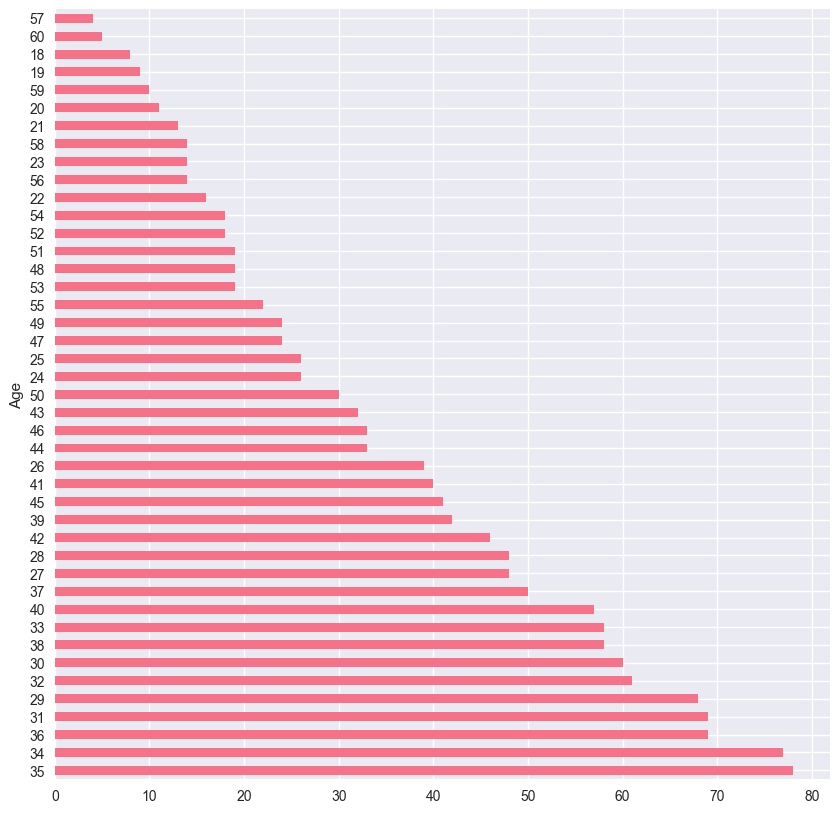

In [173]:
print(df['Age'].value_counts())
df['Age'].value_counts().plot(kind='barh', figsize=(10, 10))
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

## Возрастная группа

AgeGroup
26-35    606
36-45    468
46-55    226
18-25    123
55+       47
Name: count, dtype: int64
Пропуски: 0


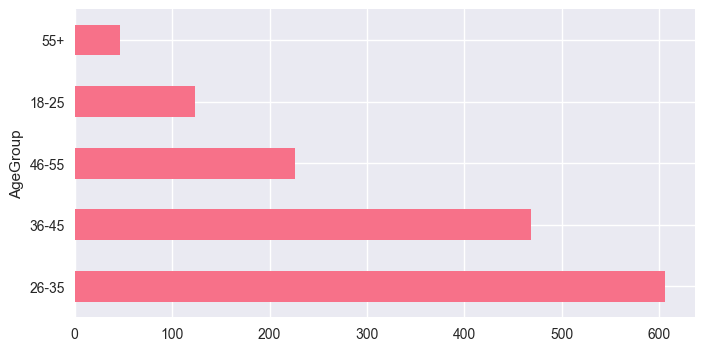

In [174]:
print(df['AgeGroup'].value_counts())
df['AgeGroup'].value_counts().plot(kind='barh', figsize=(8, 4))
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

## Уволился ли сотрудник

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='Attrition'>

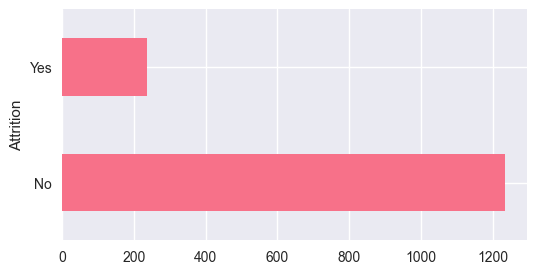

In [175]:
print(df['Attrition'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

df['Attrition'].value_counts().plot(kind='barh', figsize=(6, 3))

## Частота командировок

BusinessTravel
Travel_Rarely        1036
Travel_Frequently     277
Non-Travel            150
TravelRarely            7
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='BusinessTravel'>

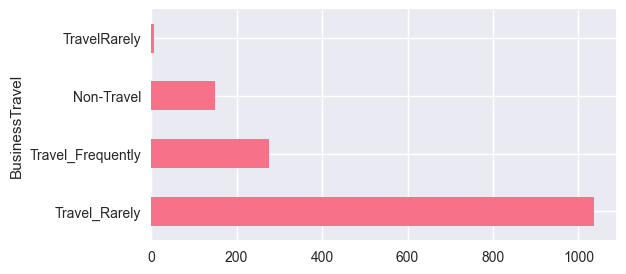

In [176]:
print(df['BusinessTravel'].value_counts())
print("Пропуски:", sum(pd.isnull(df['BusinessTravel'])))

df['BusinessTravel'].value_counts().plot(kind='barh', figsize=(6, 3))

BusinessTravel
Travel Rarely        1043
Travel Frequently     277
Non Travel            150
Name: count, dtype: int64


<Axes: ylabel='BusinessTravel'>

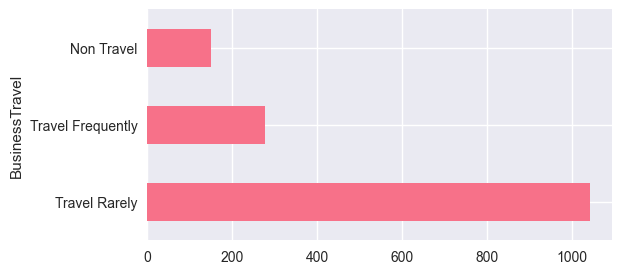

In [177]:
# Заменим все "Travel_Rarely" и "TravelRarely" на "Travel Rarely"
df["BusinessTravel"] = df["BusinessTravel"].replace(['Travel_Rarely', 'TravelRarely'], 'Travel Rarely')
# "Travel_Frequently" на "Travel Frequently"
df["BusinessTravel"] = df["BusinessTravel"].replace('Travel_Frequently', 'Travel Frequently')
# А "Non-Travel" на "Non Travel"
df["BusinessTravel"] = df["BusinessTravel"].replace('Non-Travel', 'Non Travel')

print(df['BusinessTravel'].value_counts())
df['BusinessTravel'].value_counts().plot(kind='barh', figsize=(6, 3))

# Ежедневная ставка в $ (Daily Rate)

DailyRate
691     6
530     5
408     5
1329    5
329     5
       ..
553     1
931     1
134     1
924     1
696     1
Name: count, Length: 886, dtype: int64
Пропуски: 0


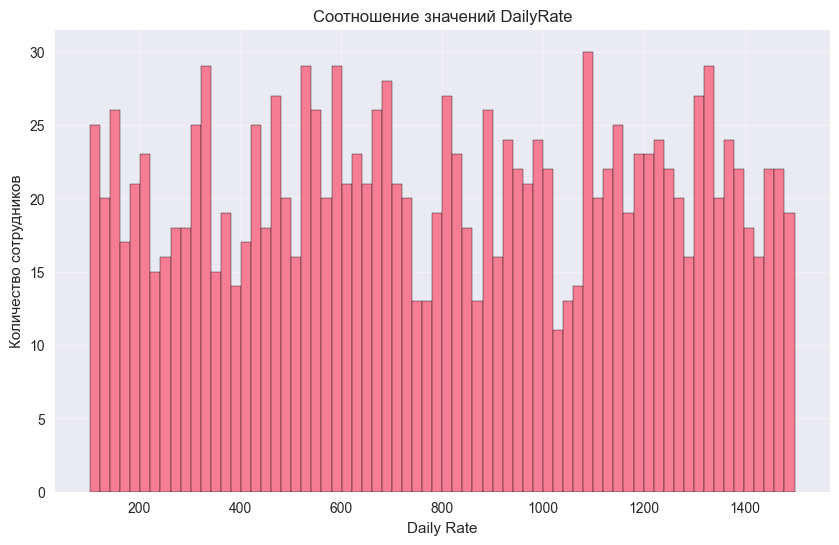

In [178]:
print(df['DailyRate'].value_counts())
# df['DailyRate'].value_counts().plot(kind='barh', figsize=(6, 20))
print("Пропуски:", sum(pd.isnull(df['DailyRate'])))

plt.figure(figsize=(10, 6))
plt.hist(df['DailyRate'], bins=70, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений DailyRate')
plt.xlabel('Daily Rate')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()

# Отдел

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Пропуски: 0


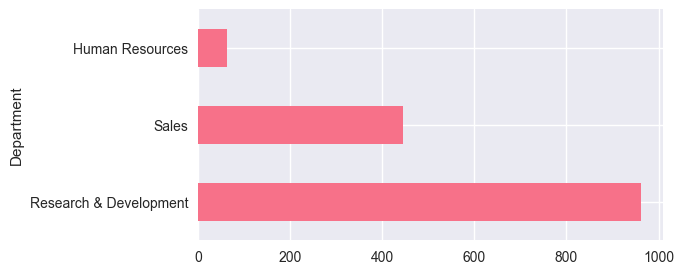

In [179]:
print(df['Department'].value_counts())
df['Department'].value_counts().plot(kind='barh', figsize=(6, 3))
print("Пропуски:", sum(pd.isnull(df['Department'])))

# Расстояние от офиса до дома в милях(?)

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
25     25
26     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64
Пропуски: 0


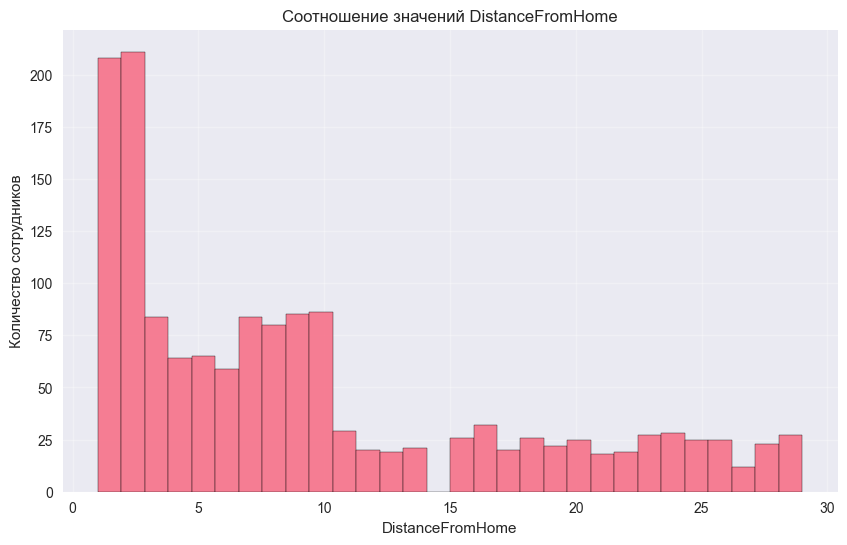

In [180]:
print(df['DistanceFromHome'].value_counts())
print("Пропуски:", sum(pd.isnull(df['DistanceFromHome'])))

plt.figure(figsize=(10, 6))
plt.hist(df['DistanceFromHome'], bins=30, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений DistanceFromHome')
plt.xlabel('DistanceFromHome')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()

# Количество высших(?) образований

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='Education'>

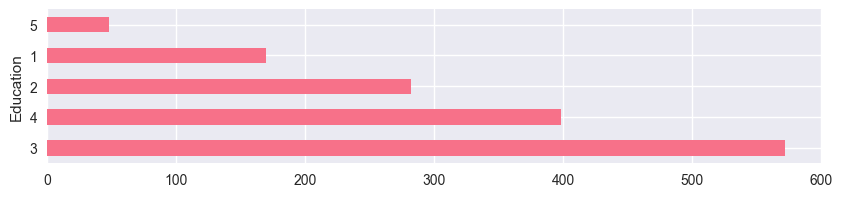

In [181]:
print(df['Education'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Education'])))

df['Education'].value_counts().plot(kind='barh', figsize=(10, 2))

# Область образования

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='EducationField'>

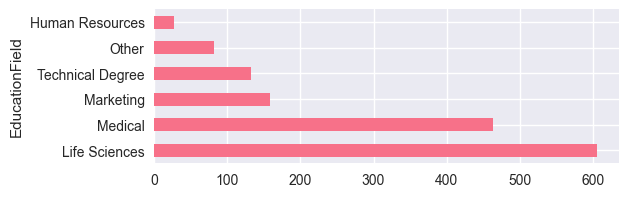

In [182]:
print(df['EducationField'].value_counts())
print("Пропуски:", sum(pd.isnull(df['EducationField'])))

df['EducationField'].value_counts().plot(kind='barh', figsize=(6, 2))


# Количество сотрудников (EmployeeCount)

In [183]:
print(df['EmployeeCount'].value_counts())
print("Пропуски:", sum(pd.isnull(df['EmployeeCount'])))

# Не несет никакой ценности, т.к. в каждом сотруднике один сотрудник :)
# => удаляем столбец

df = df.drop('EmployeeCount', axis=1)

EmployeeCount
1    1470
Name: count, dtype: int64
Пропуски: 0


# Номер сотрудника (EmployeeNumber)

In [184]:
print(df['EmployeeNumber'].value_counts())
print("Пропуски:", sum(pd.isnull(df['EmployeeNumber'])))

# Не несет никакой ценности, т.к. это просто порядковый номер сотрудника, а у нас уже есть EmpID 
# => удаляем столбец

df = df.drop('EmployeeNumber', axis=1)

EmployeeNumber
405     1
1548    1
1474    1
1468    1
1449    1
       ..
966     1
951     1
911     1
889     1
1697    1
Name: count, Length: 1470, dtype: int64
Пропуски: 0


# Оценка сотрудником условий труда (EnvironmentSatisfaction)

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='EnvironmentSatisfaction'>

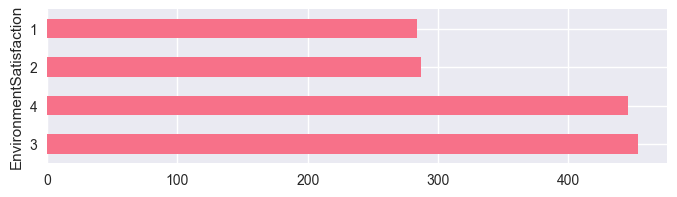

In [185]:
print(df['EnvironmentSatisfaction'].value_counts())
print("Пропуски:", sum(pd.isnull(df['EnvironmentSatisfaction'])))

df['EnvironmentSatisfaction'].value_counts().plot(kind='barh', figsize=(8, 2))


# Пол сотрудника (Gender)

Gender
Male      882
Female    588
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='Gender'>

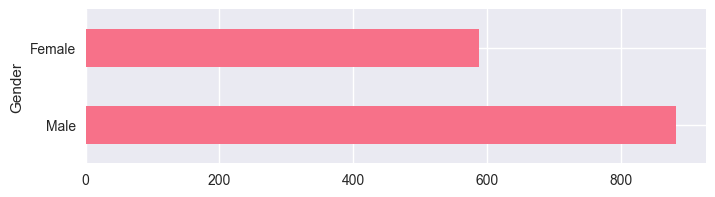

In [186]:
print(df['Gender'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Gender'])))

df['Gender'].value_counts().plot(kind='barh', figsize=(8, 2))


# Почасовая оплата (HourlyRate)

HourlyRate
66    29
48    28
42    28
98    28
84    28
      ..
69    15
53    14
68    14
38    13
34    12
Name: count, Length: 71, dtype: int64
Пропуски: 0


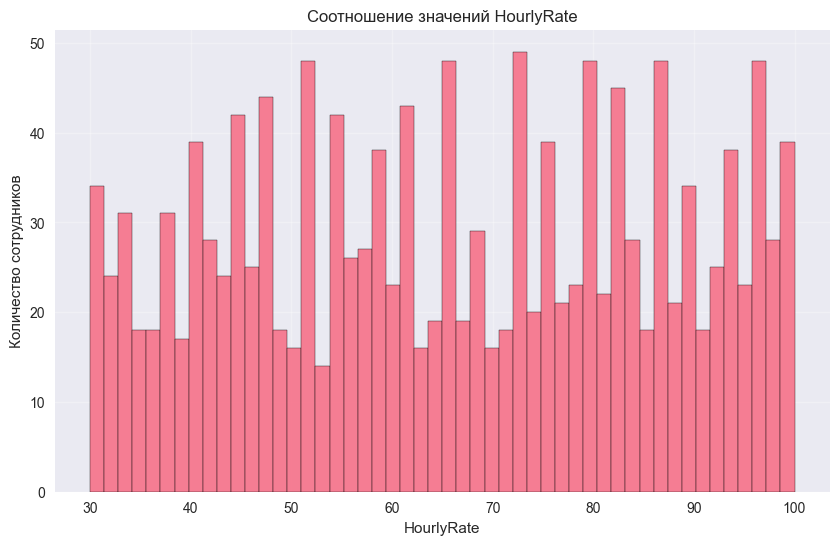

In [187]:
print(df['HourlyRate'].value_counts())
print("Пропуски:", sum(pd.isnull(df['HourlyRate'])))

plt.figure(figsize=(10, 6))
plt.hist(df['HourlyRate'], bins=50, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений HourlyRate')
plt.xlabel('HourlyRate')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()


# Вовлеченность сотрудника (JobInvolvement)

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='JobInvolvement'>

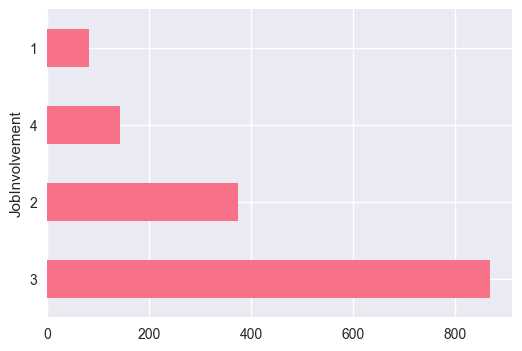

In [188]:
print(df['JobInvolvement'].value_counts())
print("Пропуски:", sum(pd.isnull(df['JobInvolvement'])))

df['JobInvolvement'].value_counts().plot(kind='barh', figsize=(6, 4))


# Уровень работы - грейд сотрудника (JobLevel)

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='JobLevel'>

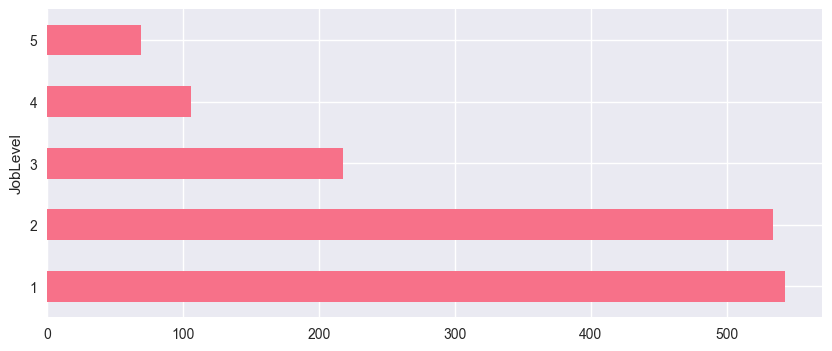

In [189]:
print(df['JobLevel'].value_counts())
print("Пропуски:", sum(pd.isnull(df['JobLevel'])))

df['JobLevel'].value_counts().plot(kind='barh', figsize=(10, 4))


# Должность сотрудника (JobRole)

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='JobRole'>

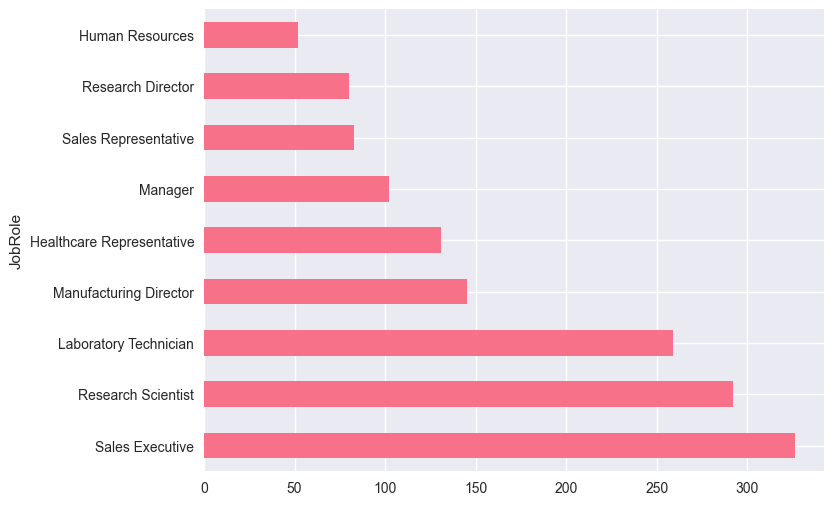

In [190]:
print(df['JobRole'].value_counts())
print("Пропуски:", sum(pd.isnull(df['JobRole'])))

df['JobRole'].value_counts().plot(kind='barh', figsize=(8, 6))


# Удовлетворенность работой (JobSatisfaction)

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='JobSatisfaction'>

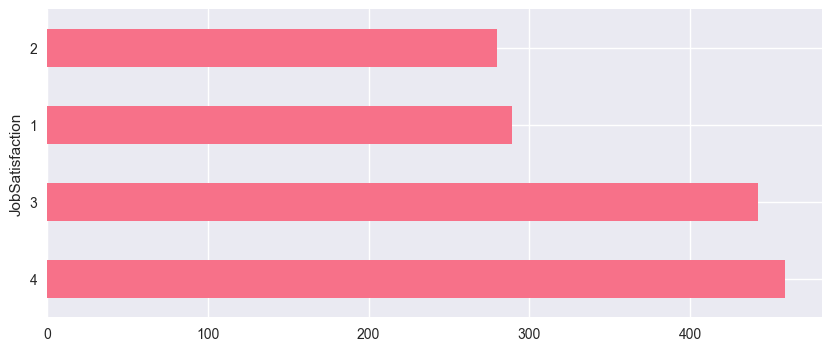

In [191]:
print(df['JobSatisfaction'].value_counts())
print("Пропуски:", sum(pd.isnull(df['JobSatisfaction'])))

df['JobSatisfaction'].value_counts().plot(kind='barh', figsize=(10, 4))


# Семейное положение (MaritalStatus)

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='MaritalStatus'>

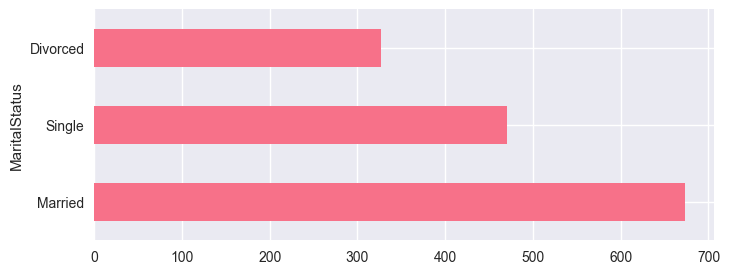

In [192]:
print(df['MaritalStatus'].value_counts())
print("Пропуски:", sum(pd.isnull(df['MaritalStatus'])))

df['MaritalStatus'].value_counts().plot(kind='barh', figsize=(8, 3))


# Месячная ФАКТИЧЕСКАЯ зарплата (MonthlyIncome)

MonthlyIncome
2342     4
2559     3
5562     3
2380     3
2404     3
        ..
5376     1
2496     1
10422    1
2837     1
10883    1
Name: count, Length: 1349, dtype: int64
MIN: 1009
MAX: 19999
Пропуски: 0


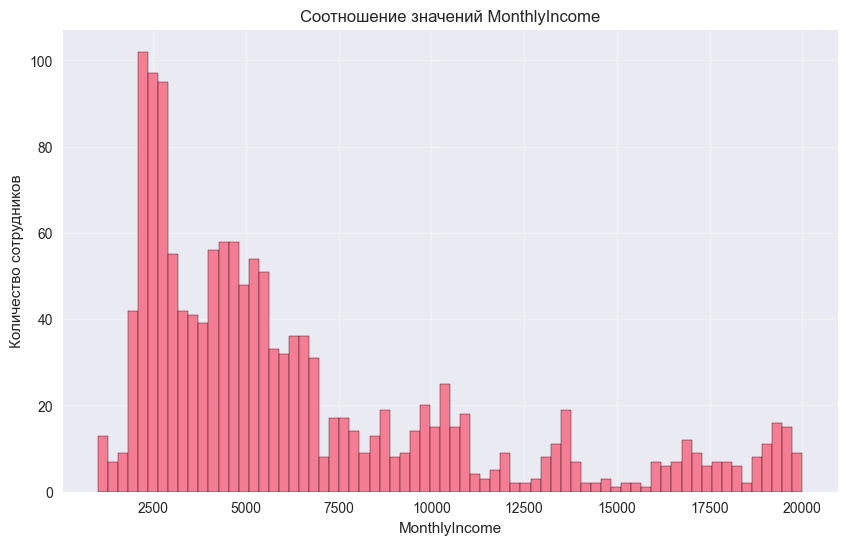

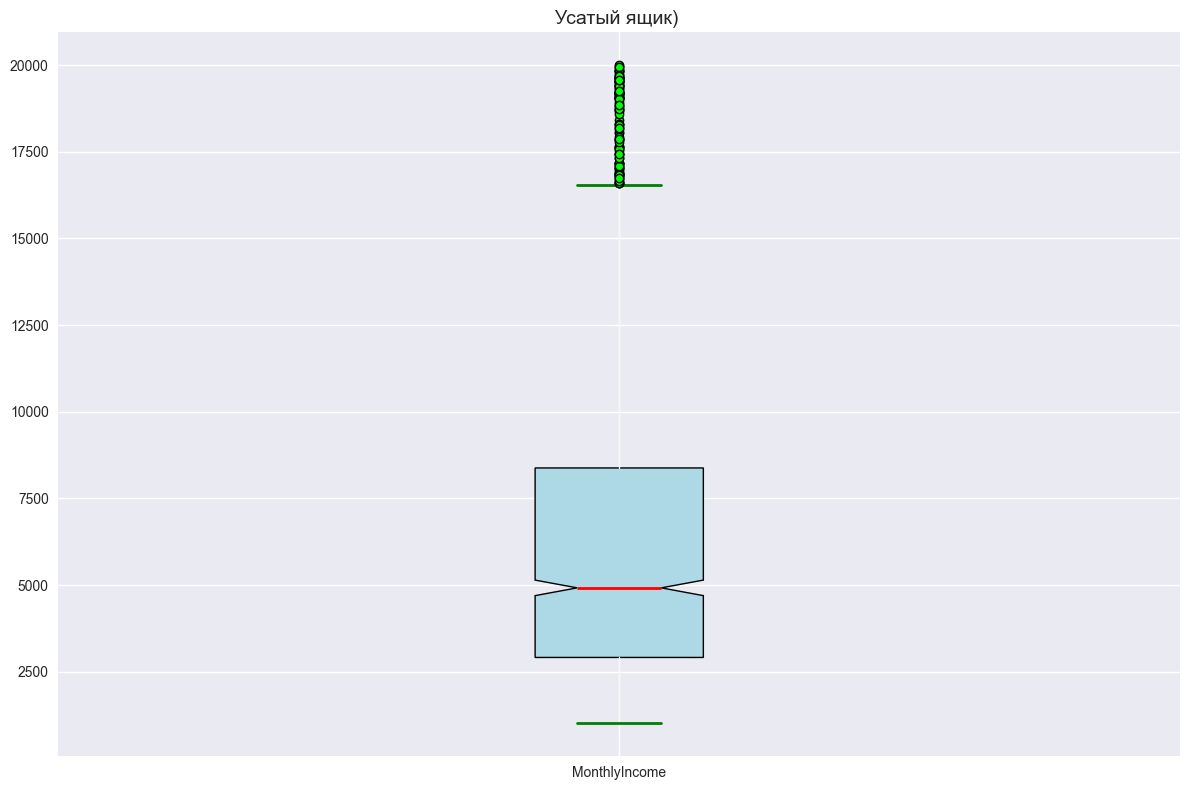

In [193]:
# ЗП после всех вычетов и надбавок

print(df['MonthlyIncome'].value_counts())
print("MIN:", min(df['MonthlyIncome']))
print("MAX:", max(df['MonthlyIncome']))
print("Пропуски:", sum(pd.isnull(df['MonthlyIncome'])))

plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyIncome'], bins=70, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()

df[['MonthlyIncome']].boxplot(
patch_artist=True, 
boxprops={'facecolor': 'lightblue'}, 
medianprops={'color': 'red', 'linewidth': 2}, 
capprops={'color': 'green', 'linewidth': 2}, 
flierprops={'marker': 'o', 'markerfacecolor': 'lime'},
notch=True, # Оценка доверительного интервала медианы
)

plt.title('Усатый ящик) ', fontsize=14)
plt.tight_layout()
plt.show()

# Диапозон ЗП (SalarySlab)

SalarySlab
Upto 5k    749
5k-10k     440
10k-15k    148
15k+       133
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='SalarySlab'>

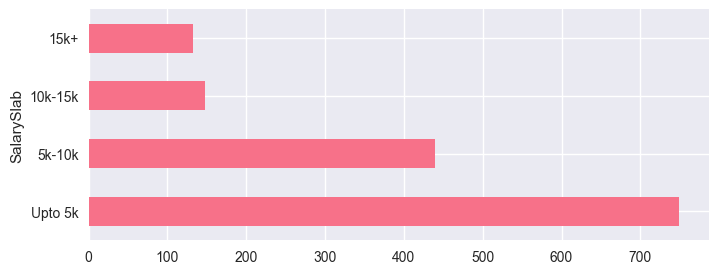

In [194]:
print(df['SalarySlab'].value_counts())
print("Пропуски:", sum(pd.isnull(df['SalarySlab'])))

df['SalarySlab'].value_counts().plot(kind='barh', figsize=(8, 3))


# Месячная зарплата - Оклад (MonthlyRate)

MonthlyRate
9150     3
4223     3
16154    2
24444    2
4156     2
        ..
2338     1
7331     1
14947    1
11135    1
20467    1
Name: count, Length: 1427, dtype: int64
Пропуски: 0


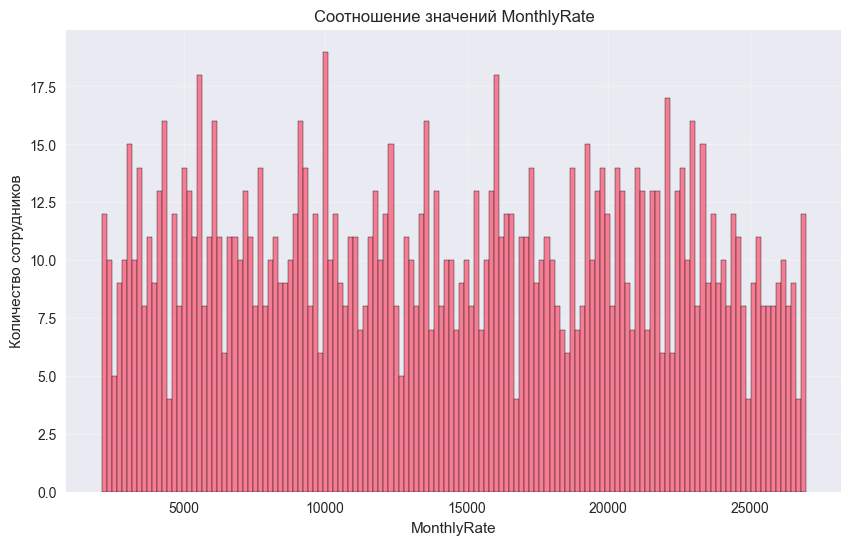

In [195]:
print(df['MonthlyRate'].value_counts())
print("Пропуски:", sum(pd.isnull(df['MonthlyRate'])))

plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyRate'], bins=140, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений MonthlyRate')
plt.xlabel('MonthlyRate')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()

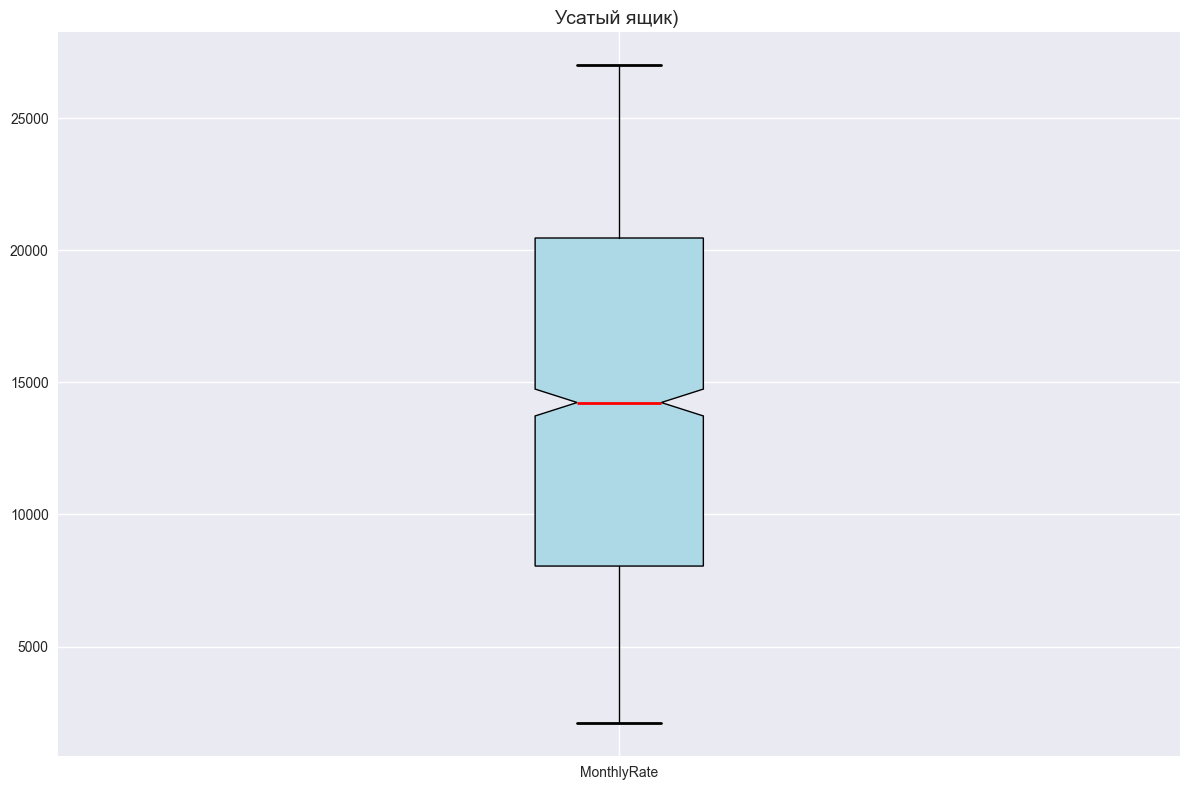

In [196]:
df[['MonthlyRate']].boxplot(
patch_artist=True,
boxprops={'facecolor': 'lightblue'}, 
medianprops={'color': 'red', 'linewidth': 2}, 
whiskerprops={'color': 'black'}, 
capprops={'linewidth': 2}, 
notch=True, # Оценка доверительного интервала медианы
)

plt.title('Усатый ящик) ', fontsize=14)
plt.tight_layout()
plt.show()

# Количество мест работы сотрудника (NumCompaniesWorked)

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='NumCompaniesWorked'>

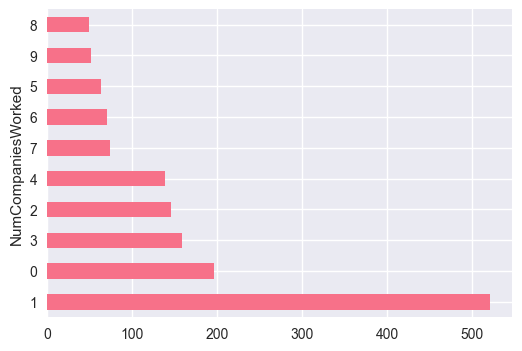

In [197]:
print(df['NumCompaniesWorked'].value_counts())
print("Пропуски:", sum(pd.isnull(df['NumCompaniesWorked'])))

df['NumCompaniesWorked'].value_counts().plot(kind='barh', figsize=(6, 4))

# Сотруднки старше 18 лет (Over18)

In [198]:
print(df['Over18'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Over18'])))

# Данный столбец не имеет смысла, т.к. в нем все значения одинаковые
# => удаляем

df = df.drop('Over18', axis=1)

Over18
Y    1470
Name: count, dtype: int64
Пропуски: 0


# Работает ли сотрудник сверхурочно / перерабатывает ли (OverTime)

OverTime
No     1054
Yes     416
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='OverTime'>

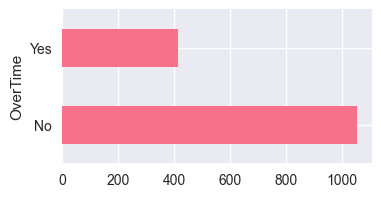

In [199]:
print(df['OverTime'].value_counts())
print("Пропуски:", sum(pd.isnull(df['OverTime'])))

df['OverTime'].value_counts().plot(kind='barh', figsize=(4, 2))

# Процент повышения ЗП  сотрудника за последний период (PercentSalaryHike)

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='PercentSalaryHike'>

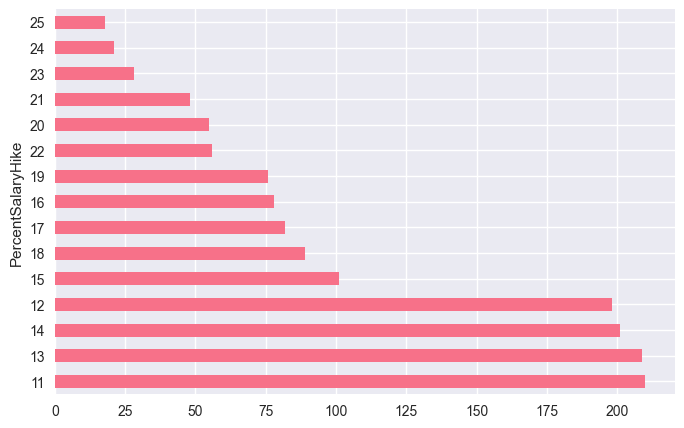

In [200]:
print(df['PercentSalaryHike'].value_counts())
print("Пропуски:", sum(pd.isnull(df['PercentSalaryHike'])))

df['PercentSalaryHike'].value_counts().plot(kind='barh', figsize=(8, 5))

# Оценка эффективности сотрудника (PerformanceRating)

PerformanceRating
3    1244
4     226
Name: count, dtype: int64
Пропуски: 0


'\n1 - Не соответствует ожиданиям (Below Expectations)\n\n2 - Соответствует ожиданиям (Meets Expectations)\n\n3 - Превышает ожидания (Exceeds Expectations)\n\n4 - Значительно превышает ожидания (Outstanding)\n\n5 - Выдающиеся результаты (Exceptional) в некоторых компаниях\n'

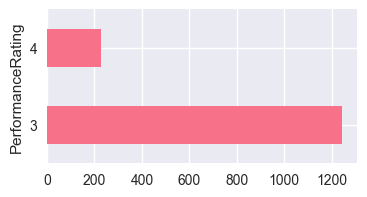

In [201]:
# Четырехбальная система оценивания эфективности сотрудника 

print(df['PerformanceRating'].value_counts())
print("Пропуски:", sum(pd.isnull(df['PerformanceRating'])))

df['PerformanceRating'].value_counts().plot(kind='barh', figsize=(4, 2))

"""
1 - Не соответствует ожиданиям (Below Expectations)

2 - Соответствует ожиданиям (Meets Expectations)

3 - Превышает ожидания (Exceeds Expectations)

4 - Значительно превышает ожидания (Outstanding)

5 - Выдающиеся результаты (Exceptional) в некоторых компаниях
"""

# Удовлетворенность взаимоотношениями (RelationshipSatisfaction)

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='RelationshipSatisfaction'>

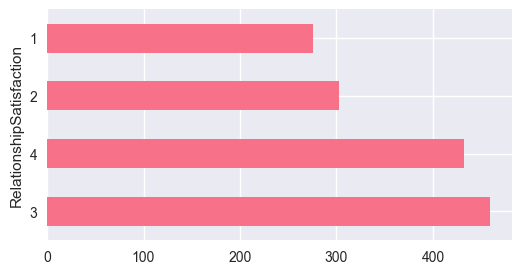

In [202]:
print(df['RelationshipSatisfaction'].value_counts())
print("Пропуски:", sum(pd.isnull(df['RelationshipSatisfaction'])))

df['RelationshipSatisfaction'].value_counts().plot(kind='barh', figsize=(6, 3))

# Стандартные часы (StandardHours)

In [203]:
# Количество часов за 2 недели

print(df['StandardHours'].value_counts())
print("Пропуски:", sum(pd.isnull(df['StandardHours'])))

# Данный столбец не имеет смысла, т.к. в нем все значения одинаковые
# => удаляем

df = df.drop('StandardHours', axis=1)

StandardHours
80    1470
Name: count, dtype: int64
Пропуски: 0


#  (StockOptionLevel)

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='StockOptionLevel'>

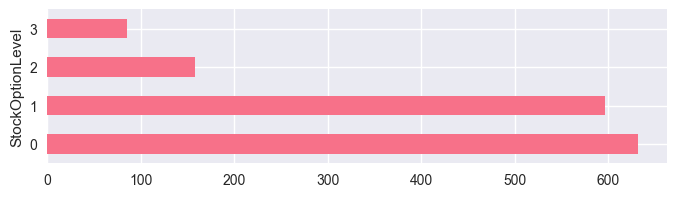

In [204]:
print(df['StockOptionLevel'].value_counts())
print("Пропуски:", sum(pd.isnull(df['StockOptionLevel'])))

df['StockOptionLevel'].value_counts().plot(kind='barh', figsize=(8, 2))

# Общий стаж работы (TotalWorkingYears)

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='TotalWorkingYears'>

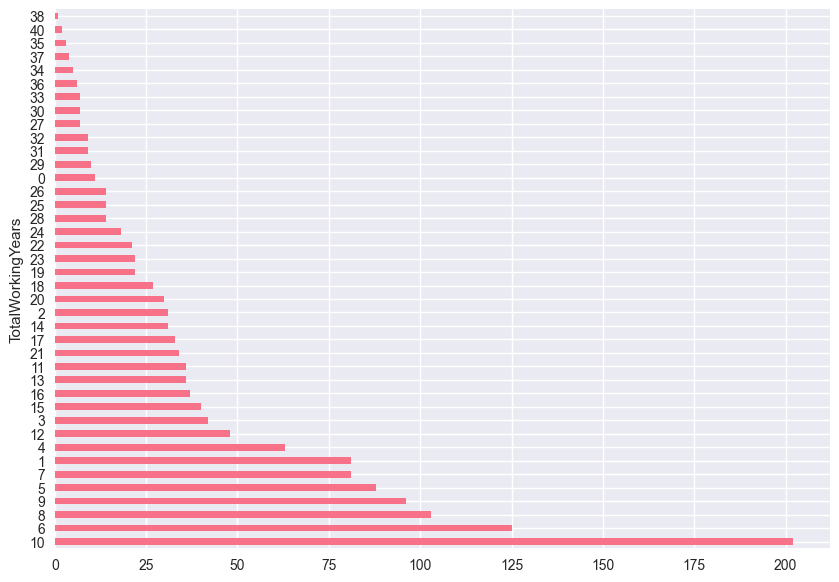

In [205]:
print(df['TotalWorkingYears'].value_counts())
print("Пропуски:", sum(pd.isnull(df['TotalWorkingYears'])))

df['TotalWorkingYears'].value_counts().plot(kind='barh', figsize=(10, 7))

# Время на обучение за последний год (TrainingTimesLastYear)

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='TrainingTimesLastYear'>

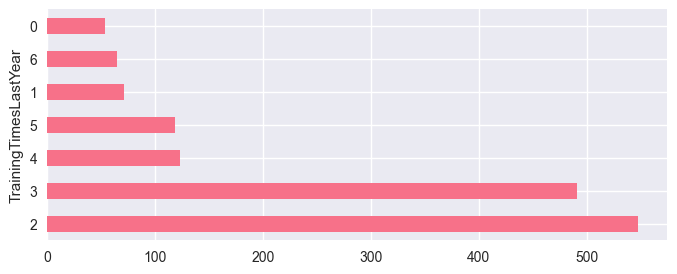

In [206]:
print(df['TrainingTimesLastYear'].value_counts())
print("Пропуски:", sum(pd.isnull(df['TrainingTimesLastYear'])))

df['TrainingTimesLastYear'].value_counts().plot(kind='barh', figsize=(8, 3))

# Баланс между работой и личной жизнью (WorkLifeBalance)

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='WorkLifeBalance'>

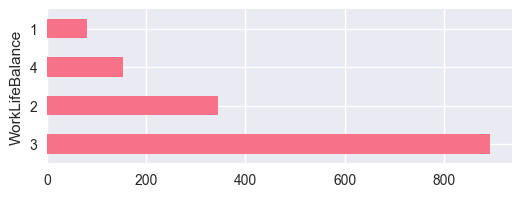

In [207]:
# Оценка сотрудником того, насколько хорошо он может балансировать между рабочими обязанностями и личной жизнью.

print(df['WorkLifeBalance'].value_counts())
print("Пропуски:", sum(pd.isnull(df['WorkLifeBalance'])))

df['WorkLifeBalance'].value_counts().plot(kind='barh', figsize=(6, 2))

# Стаж в компании (YearsAtCompany)

YearsAtCompany
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
29      2
36      2
27      2
23      2
30      1
34      1
37      1
40      1
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='YearsAtCompany'>

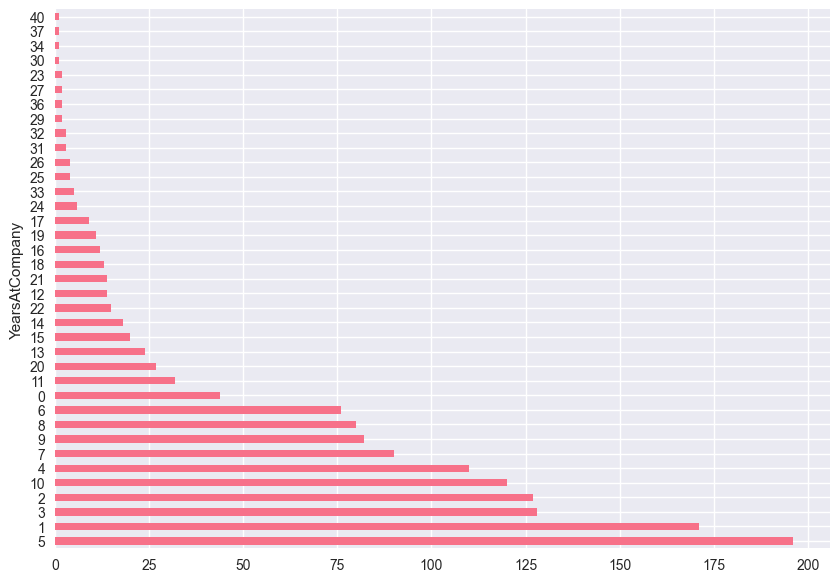

In [208]:
print(df['YearsAtCompany'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsAtCompany'])))

df['YearsAtCompany'].value_counts().plot(kind='barh', figsize=(10, 7))

# Стаж в текущей должности (YearsInCurrentRole)

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='YearsInCurrentRole'>

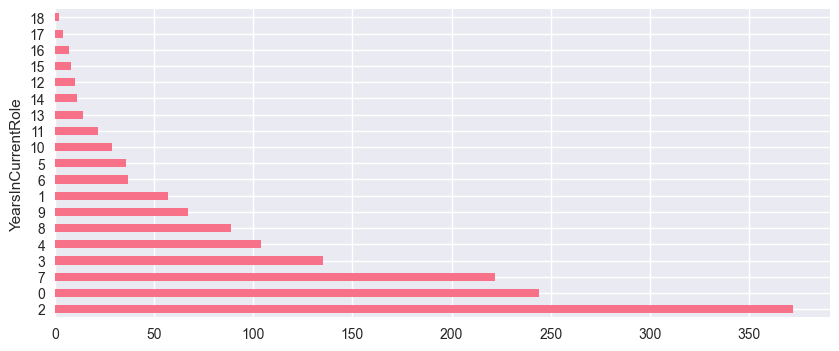

In [209]:
print(df['YearsInCurrentRole'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsInCurrentRole'])))

df['YearsInCurrentRole'].value_counts().plot(kind='barh', figsize=(10, 4))

# Лет с последнего повышения (YearsSinceLastPromotion)

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='YearsSinceLastPromotion'>

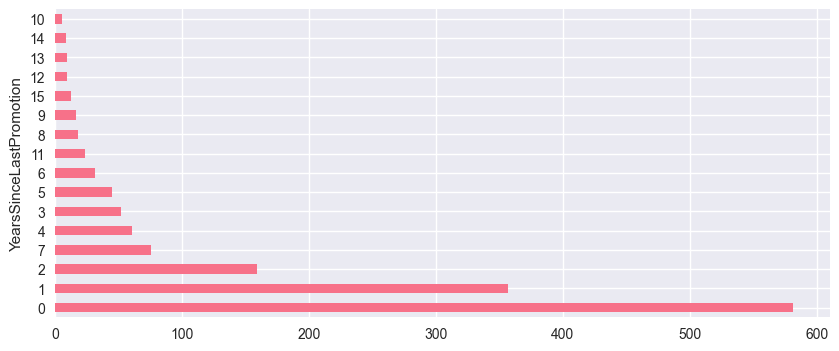

In [210]:
print(df['YearsSinceLastPromotion'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsSinceLastPromotion'])))

df['YearsSinceLastPromotion'].value_counts().plot(kind='barh', figsize=(10, 4))

# Стаж с текущим руководителем (YearsWithCurrManager)

YearsWithCurrentManager
2.0     328
0.0     252
7.0     210
3.0     138
8.0      99
4.0      94
1.0      75
9.0      61
5.0      30
6.0      29
10.0     27
11.0     21
12.0     17
13.0     14
17.0      6
15.0      5
14.0      5
16.0      2
Name: count, dtype: int64
Пропуски: 57


<Axes: ylabel='YearsWithCurrentManager'>

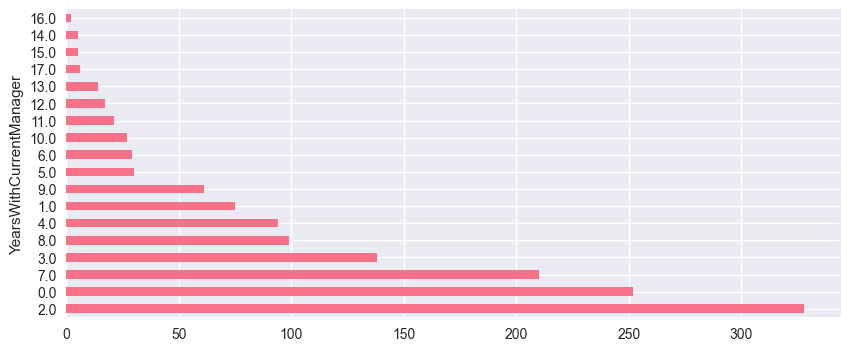

In [211]:
# Переименнуем YearsWithCurrManager в YearsWithCurrentManager

df = df.rename(columns={'YearsWithCurrManager': 'YearsWithCurrentManager'})

print(df['YearsWithCurrentManager'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsWithCurrentManager'])))

df['YearsWithCurrentManager'].value_counts().plot(kind='barh', figsize=(10, 4))

# В столбце есть 57 пропусков, в других столбцах пропусков не было, так что можем просто 
# удалить ВСЕ строки с пустыми ячейками при помощи .dropna() без уточнения столбца.

In [212]:
# Однако для чистоты удалим строки только с пропусками в столбце YearsWithCurrentManager
df = df.dropna(subset=['YearsWithCurrentManager'])
print(df['YearsWithCurrentManager'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsWithCurrentManager'])))

YearsWithCurrentManager
2.0     328
0.0     252
7.0     210
3.0     138
8.0      99
4.0      94
1.0      75
9.0      61
5.0      30
6.0      29
10.0     27
11.0     21
12.0     17
13.0     14
17.0      6
15.0      5
14.0      5
16.0      2
Name: count, dtype: int64
Пропуски: 0


# Сравниваем датасет после чистки

In [213]:
# Выводим информацю о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1413 non-null   object 
 1   Age                       1413 non-null   int64  
 2   AgeGroup                  1413 non-null   object 
 3   Attrition                 1413 non-null   object 
 4   BusinessTravel            1413 non-null   object 
 5   DailyRate                 1413 non-null   int64  
 6   Department                1413 non-null   object 
 7   DistanceFromHome          1413 non-null   int64  
 8   Education                 1413 non-null   int64  
 9   EducationField            1413 non-null   object 
 10  EnvironmentSatisfaction   1413 non-null   int64  
 11  Gender                    1413 non-null   object 
 12  HourlyRate                1413 non-null   int64  
 13  JobInvolvement            1413 non-null   int64  
 14  JobLevel     

In [214]:
data_len_finish=df.shape[0]
print("Строк в исходном наборе:",data_len_start)
print("Строк в наборе после обработки:",data_len_finish)
print("Пустых ячеек:", df.isna().sum().sum())

Строк в исходном наборе: 1480
Строк в наборе после обработки: 1413
Пустых ячеек: 0


In [215]:
df.to_csv('HR_Analytics_Processed.csv', index=False)

# Корреляционный анализ (LAB 2)

In [216]:
df = pd.read_csv('HR_Analytics_Processed.csv')

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("=== ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ПРОДУКТИВНОСТИ СОТРУДНИКОВ ===\n")

# 1. ОСНОВНОЙ ОБЗОР ДАННЫХ
print("1. ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
print("=" * 50)
print(f"Размер датасета: {df.shape}")
print(f"Количество сотрудников: {len(df)}")
print("\nТипы данных:")
print(df.dtypes.value_counts())

# Получаем числовые колонки
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
category_columns = df.select_dtypes(include=[np.object_]).columns.tolist()

print(f"\nЧИСЛОВЫЕ ПАРАМЕТРЫ ({len(numeric_columns)}):")
print("=" * 50)
print("Список числовых параметров:")
print(numeric_columns)

print(f"\nКАТЕГОРИАЛЬНЫЕ ПАРАМЕТРЫ ({len(numeric_columns)}):")
print("=" * 50)
print("Список категориальных параметров:")
print(category_columns)

print(f"\nЦелевая переменная - PerformanceRating:")
print(df['PerformanceRating'].value_counts().sort_index())

numeric_columns.remove('PerformanceRating') # Удаляем для дальнейшего анализа числовых переменных 
category_columns.remove('EmpID') # Удаляем для дальнейшего анализа  

=== ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ПРОДУКТИВНОСТИ СОТРУДНИКОВ ===

1. ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ:
Размер датасета: (1413, 34)
Количество сотрудников: 1413

Типы данных:
int64      22
object     11
float64     1
Name: count, dtype: int64

ЧИСЛОВЫЕ ПАРАМЕТРЫ (23):
Список числовых параметров:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager']

КАТЕГОРИАЛЬНЫЕ ПАРАМЕТРЫ (23):
Список категориальных параметров:
['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']

Целевая переменная - PerformanceRating:
Performanc

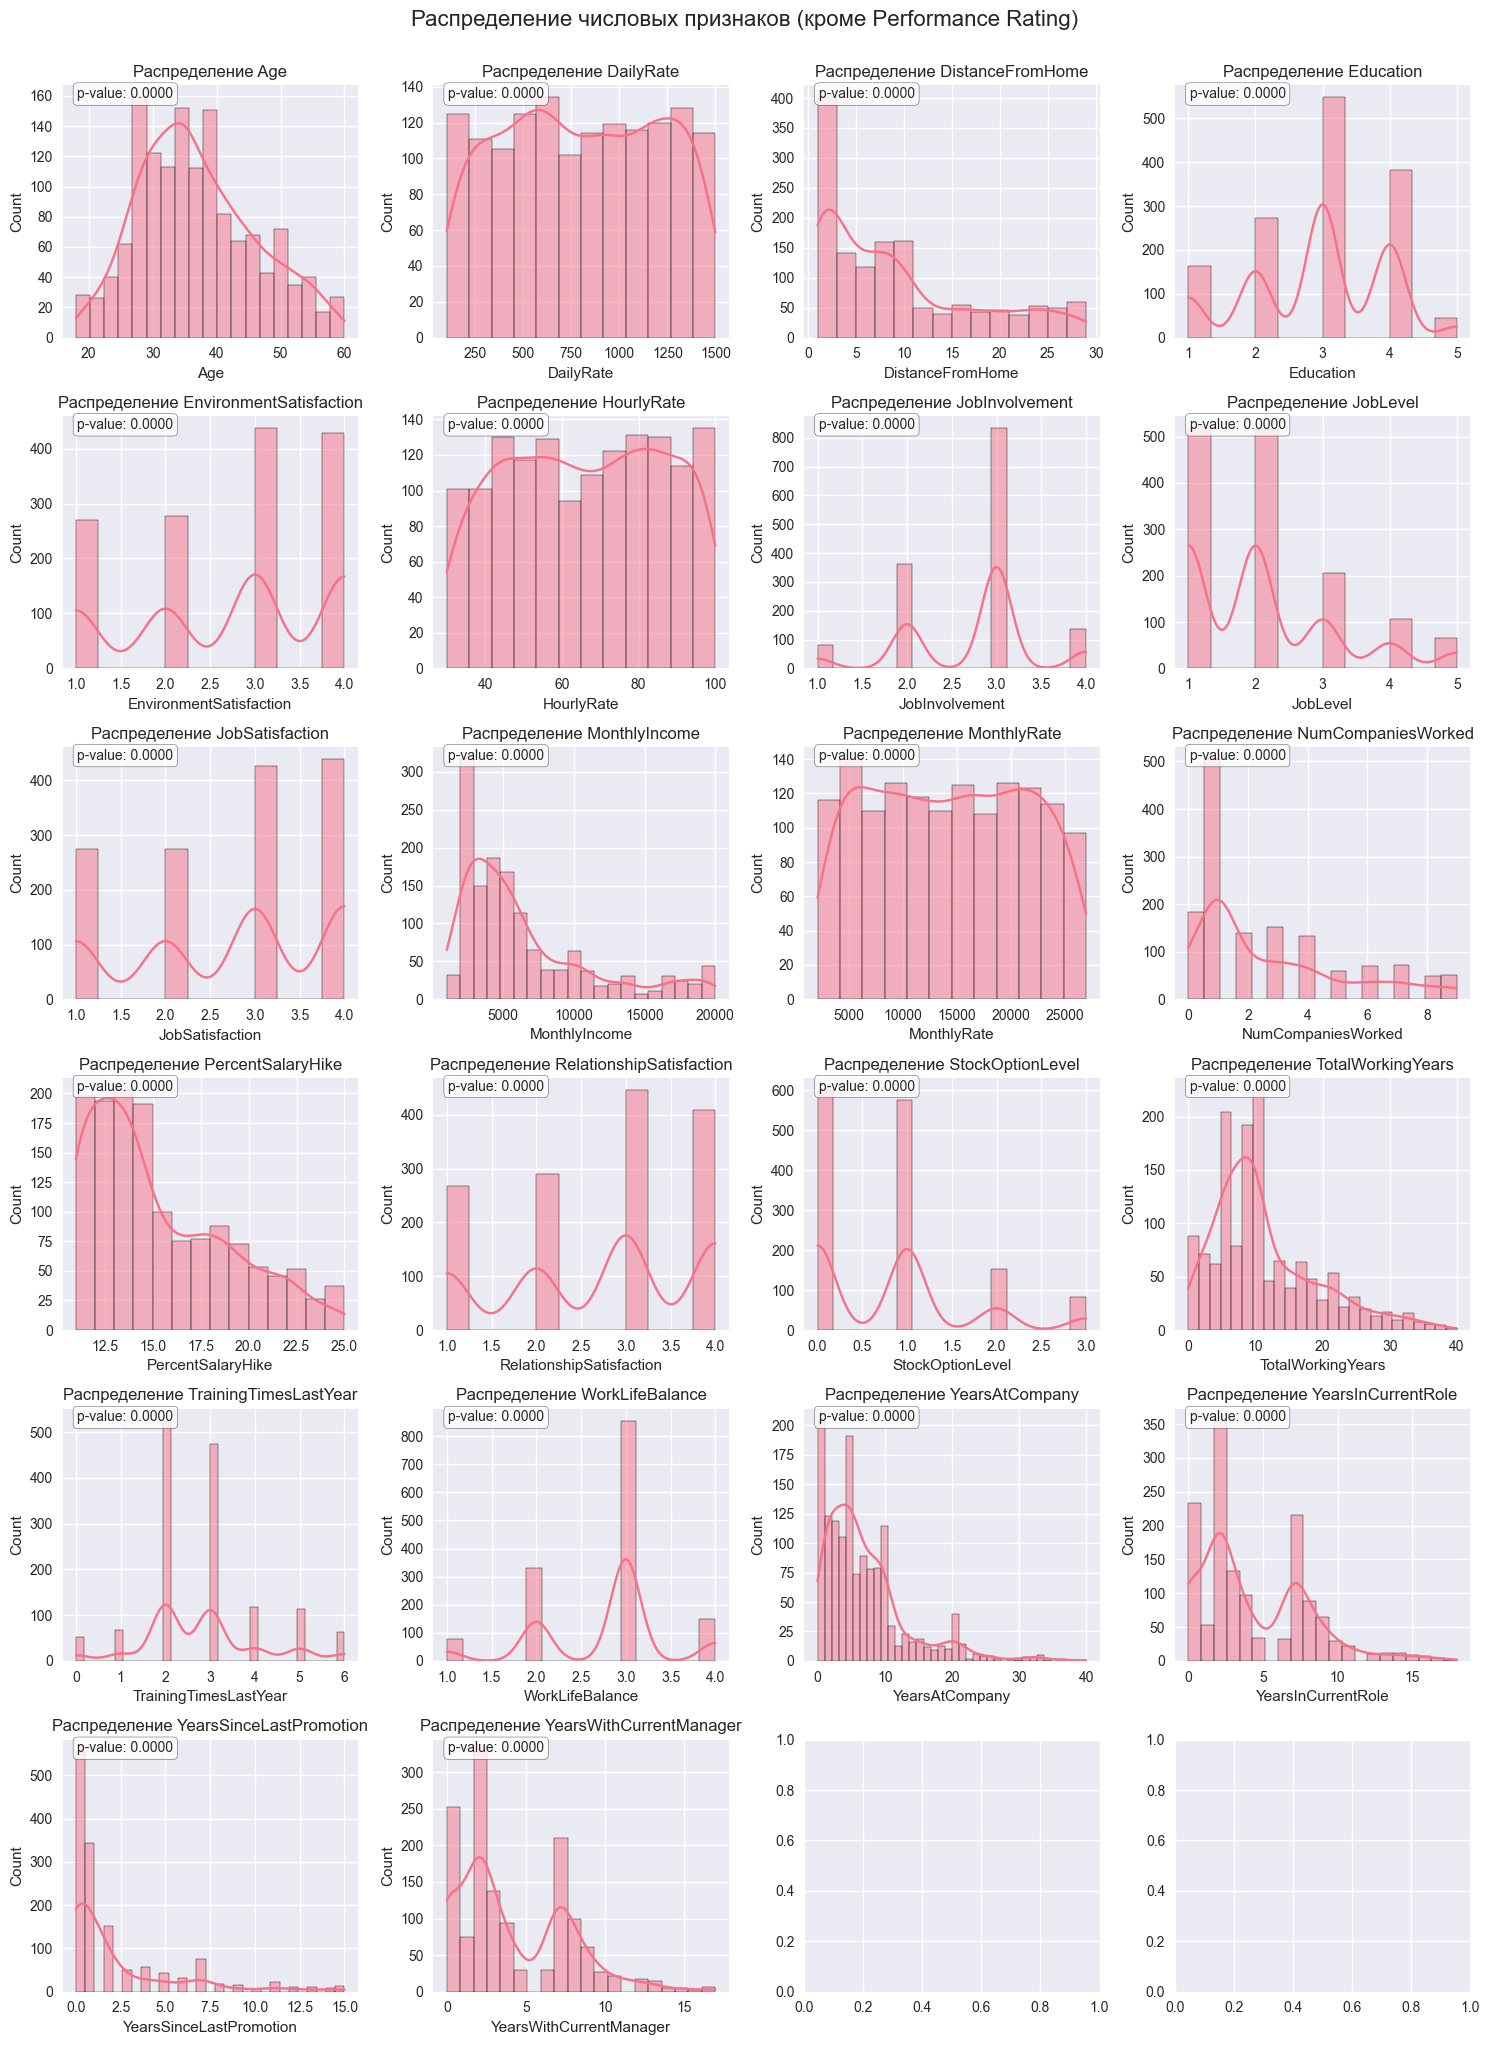

In [218]:
# Выбираем ключевые числовые признаки

fig, axes = plt.subplots(6, 4, figsize=(15, 20))

axes = axes.ravel()

for i, feature in enumerate(numeric_columns):
    if i < len(numeric_columns):
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f"Распределение {feature}", fontsize=12)
        # Тест на нормальность
        stat, p_value = normaltest(df[feature].dropna())
        axes[i].text(
            0.05,
            0.95,
            f"p-value: {p_value:.4f}",
            transform=axes[i].transAxes,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
        )
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle(
    "Распределение числовых признаков (кроме Performance Rating)", y=1.02, fontsize=16
)
plt.show()

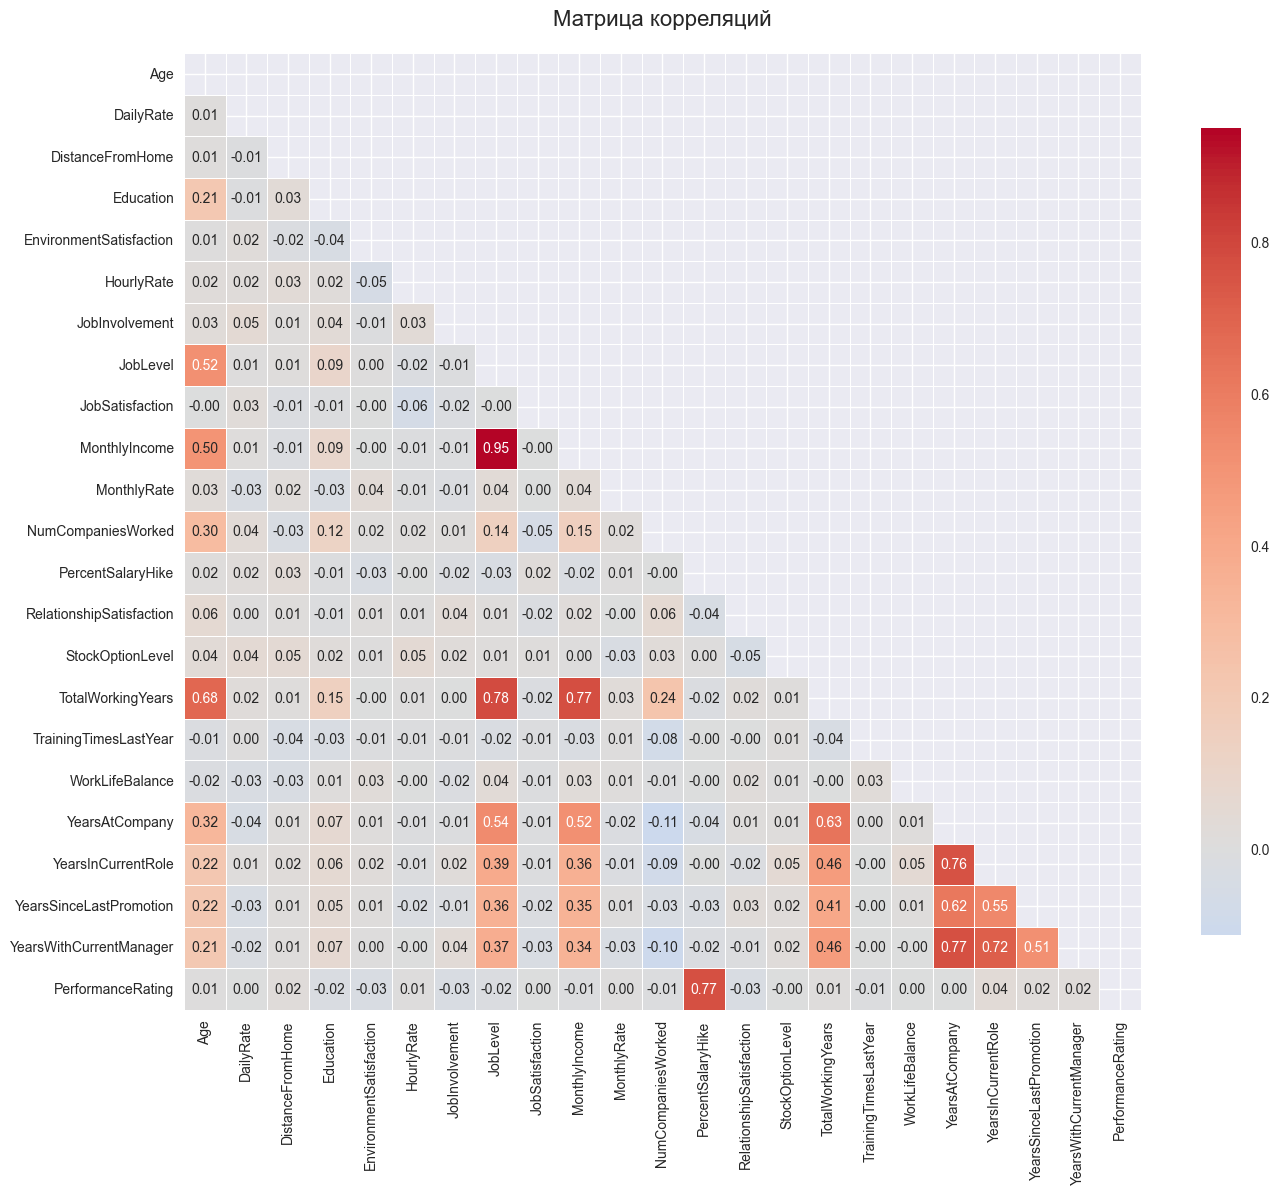


ДИАГНОСТИКА КОРРЕЛЯЦИЙ С ПРОДУКТИВНОСТЬЮ:
Статистика по PerformanceRating:
count    1413.000000
mean        3.151451
std         0.358615
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

Уникальные значения: [3, 4]

ПОЛНЫЙ СПИСОК КОРРЕЛЯЦИЙ С PERFORMANCERATING:
PercentSalaryHike              |   0.771 | сильная ↑ положительная ***
YearsInCurrentRole             |   0.039 | очень слабая ↑ положительная 
YearsWithCurrentManager        |   0.022 | очень слабая ↑ положительная 
DistanceFromHome               |   0.020 | очень слабая ↑ положительная 
YearsSinceLastPromotion        |   0.016 | очень слабая ↑ положительная 
TotalWorkingYears              |   0.010 | очень слабая ↑ положительная 
Age                            |   0.006 | очень слабая ↑ положительная 
HourlyRate                     |   0.005 | очень слабая ↑ положительная 
MonthlyRate                    |   0.005 | очень слабая ↑ 

In [219]:
# Выбираем ключевые числовые признаки для корреляционного анализа
numeric_columns.append('PerformanceRating')
correlation_features = numeric_columns

plt.figure(figsize=(14, 12))
correlation_matrix = df[correlation_features].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Матрица корреляций', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nДИАГНОСТИКА КОРРЕЛЯЦИЙ С ПРОДУКТИВНОСТЬЮ:")
print("=" * 60)

# Сначала проверим, что данные загружены правильно
print("Статистика по PerformanceRating:")
print(df['PerformanceRating'].describe())
print(f"\nУникальные значения: {sorted(df['PerformanceRating'].unique())}")

# Выведем ВСЕ корреляции, чтобы увидеть реальные значения
print("\nПОЛНЫЙ СПИСОК КОРРЕЛЯЦИЙ С PERFORMANCERATING:")
print("=" * 60)
performance_correlations = correlation_matrix.loc['PerformanceRating'].sort_values(ascending=False)

for feature, corr in performance_correlations.items():
    if feature != 'PerformanceRating':  # Исключаем корреляцию с самим собой
        strength = "сильная" if abs(corr) > 0.3 else "умеренная" if abs(corr) > 0.15 else "слабая" if abs(corr) > 0.05 else "очень слабая"
        direction = "↑ положительная" if corr > 0 else "↓ отрицательная"
        significance = "***" if abs(corr) > 0.2 else "**" if abs(corr) > 0.1 else "*" if abs(corr) > 0.05 else ""
        print(f"{feature:30} | {corr:7.3f} | {strength} {direction} {significance}")

print("\nКЛЮЧЕВЫЕ КОРРЕЛЯЦИИ С ПРОДУКТИВНОСТЬЮ:")
print("=" * 60)

# Уберем фильтр и покажем все корреляции, отсортированные по абсолютному значению
significant_correlations = []
for feature in correlation_features[1:]:
    corr = correlation_matrix.loc['PerformanceRating', feature]
    significant_correlations.append((feature, corr, abs(corr)))

# Сортируем по абсолютному значению корреляции
significant_correlations.sort(key=lambda x: x[2], reverse=True)

if significant_correlations:
    for feature, corr, abs_corr in significant_correlations:
        if abs_corr > 0:  # все ненулевые корреляции
            strength = "сильная" if abs_corr > 0.3 else "умеренная" if abs_corr > 0.15 else "слабая"
            direction = "↑ положительная" if corr > 0 else "↓ отрицательная"
            print(f"{feature:25} | {corr:7.3f} | {strength} {direction}")
else:
    print("❌ Действительно нет значимых корреляций с PerformanceRating")
    print("\nВОЗМОЖНЫЕ ПРИЧИНЫ:")
    print("1. PerformanceRating имеет мало вариантов значений (например, только 3,4)")
    print("2. Данные требуют преобразования (логарифмирование, категоризация)")
    print("3. Нужно анализировать нелинейные зависимости")

АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ:


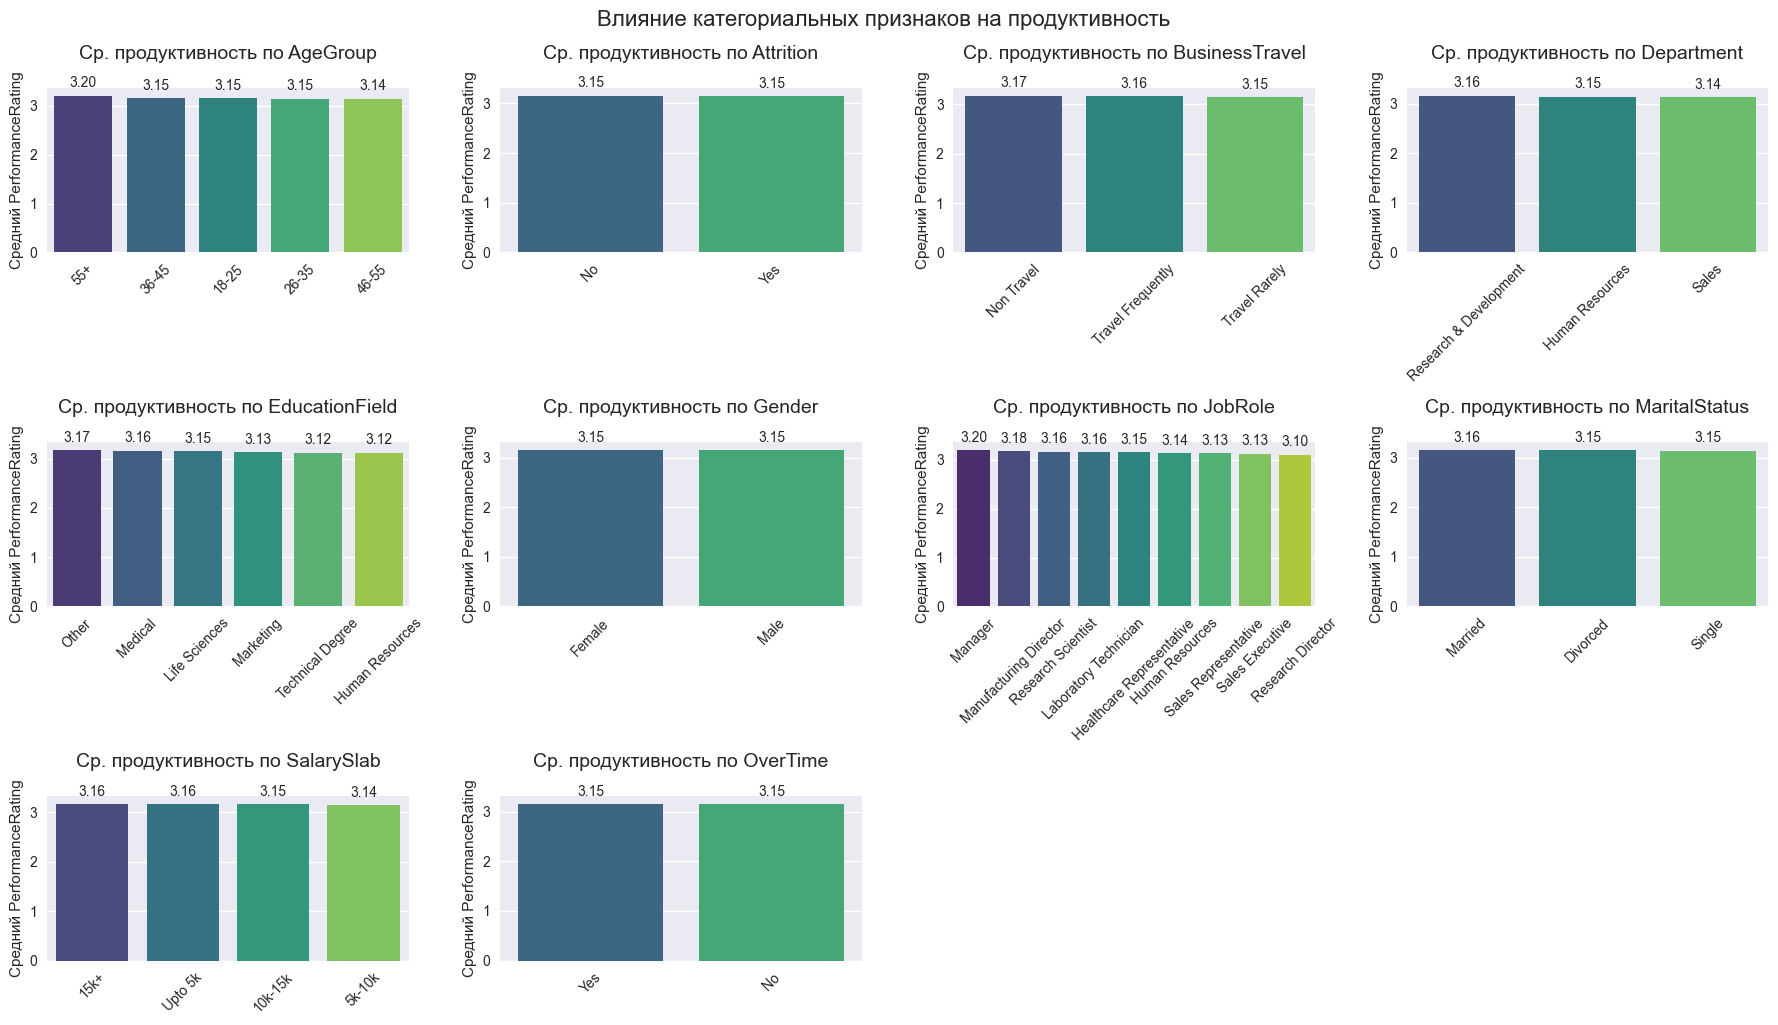


ТОП-3 КАТЕГОРИАЛЬНЫХ ПРИЗНАКА ПО ВЛИЯНИЮ НА ПРОДУКТИВНОСТЬ:
1. JobRole              | Размах средних: 0.096 | p-value: 0.6281 (не знач.)
2. AgeGroup             | Размах средних: 0.060 | p-value: 0.8830 (не знач.)
3. EducationField       | Размах средних: 0.060 | p-value: 0.7169 (не знач.)


In [222]:
# Создаем список только тех колонок, которые есть в датафрейме
existing_cat_cols = [col for col in category_columns if col in df.columns]

print("АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ:")
print("=" * 50)

fig, axes = plt.subplots(3, 4, figsize=(18, 10)) # Подстройте под количество признаков
axes = axes.ravel()

for i, feature in enumerate(existing_cat_cols):
    # Считаем средний PerformanceRating для каждой категории
    category_performance = df.groupby(feature)['PerformanceRating'].mean().sort_values(ascending=False)
    
    # Строим барплот
    sns.barplot(x=category_performance.index, y=category_performance.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Ср. продуктивность по {feature}\n', fontsize=14)
    axes[i].set_ylabel('Средний PerformanceRating')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Добавляем значения на столбцы
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

# Скрываем пустые subplot'ы, если признаки закончились
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle("Влияние категориальных признаков на продуктивность", y=1.02, fontsize=16)
plt.show()

# Текстовый вывод с ранжированием
print("\nТОП-3 КАТЕГОРИАЛЬНЫХ ПРИЗНАКА ПО ВЛИЯНИЮ НА ПРОДУКТИВНОСТЬ:")
print("=" * 60)
performance_impact = {}

for feature in existing_cat_cols:
    # Используем F-статистику из ANOVA как меру влияния категориального признака на числовой
    groups = [group['PerformanceRating'].values for name, group in df.groupby(feature)]
    from scipy.stats import f_oneway
    f_stat, p_value = f_oneway(*groups)
    # В качестве "силы" влияния можно использовать eta-squared (условно). Для простоты будем использовать размах средних.
    mean_range = df.groupby(feature)['PerformanceRating'].mean().max() - df.groupby(feature)['PerformanceRating'].mean().min()
    performance_impact[feature] = {'mean_range': mean_range, 'p_value': p_value}

# Сортируем по размаху средних (чем больше, тем сильнее влияние)
sorted_impact = sorted(performance_impact.items(), key=lambda x: x[1]['mean_range'], reverse=True)

for i, (feature, stats) in enumerate(sorted_impact[:3], 1):
    significance = "***" if stats['p_value'] < 0.001 else "**" if stats['p_value'] < 0.01 else "*" if stats['p_value'] < 0.05 else "(не знач.)"
    print(f"{i}. {feature:20} | Размах средних: {stats['mean_range']:.3f} | p-value: {stats['p_value']:.4f} {significance}")

АНАЛИЗ ТОП-5 ПРИЗНАКОВ ВЛИЯНИЯ НА ПРОДУКТИВНОСТЬ

КРИТИЧЕСКОЕ НАБЛЮДЕНИЕ:
- PerformanceRating имеет только 2 значения [3, 4] с доминированием 3 (75% перцентиль = 3)
- Это ОЧЕНЬ ограниченный диапазон для корреляционного анализа
- Большинство корреляций близки к нулю, что ожидаемо при таких данных


ТОП-5 ПРИЗНАКОВ:
----------------------------------------------------------------------
1. PercentSalaryHike         | Корреляция: 0.771 | Тип: numeric
2. JobRole                   | Размах средних: 0.096 | Тип: categorical
3. AgeGroup                  | Размах средних: 0.060 | Тип: categorical
4. EducationField            | Размах средних: 0.060 | Тип: categorical
5. YearsInCurrentRole        | Корреляция: 0.039 | Тип: numeric


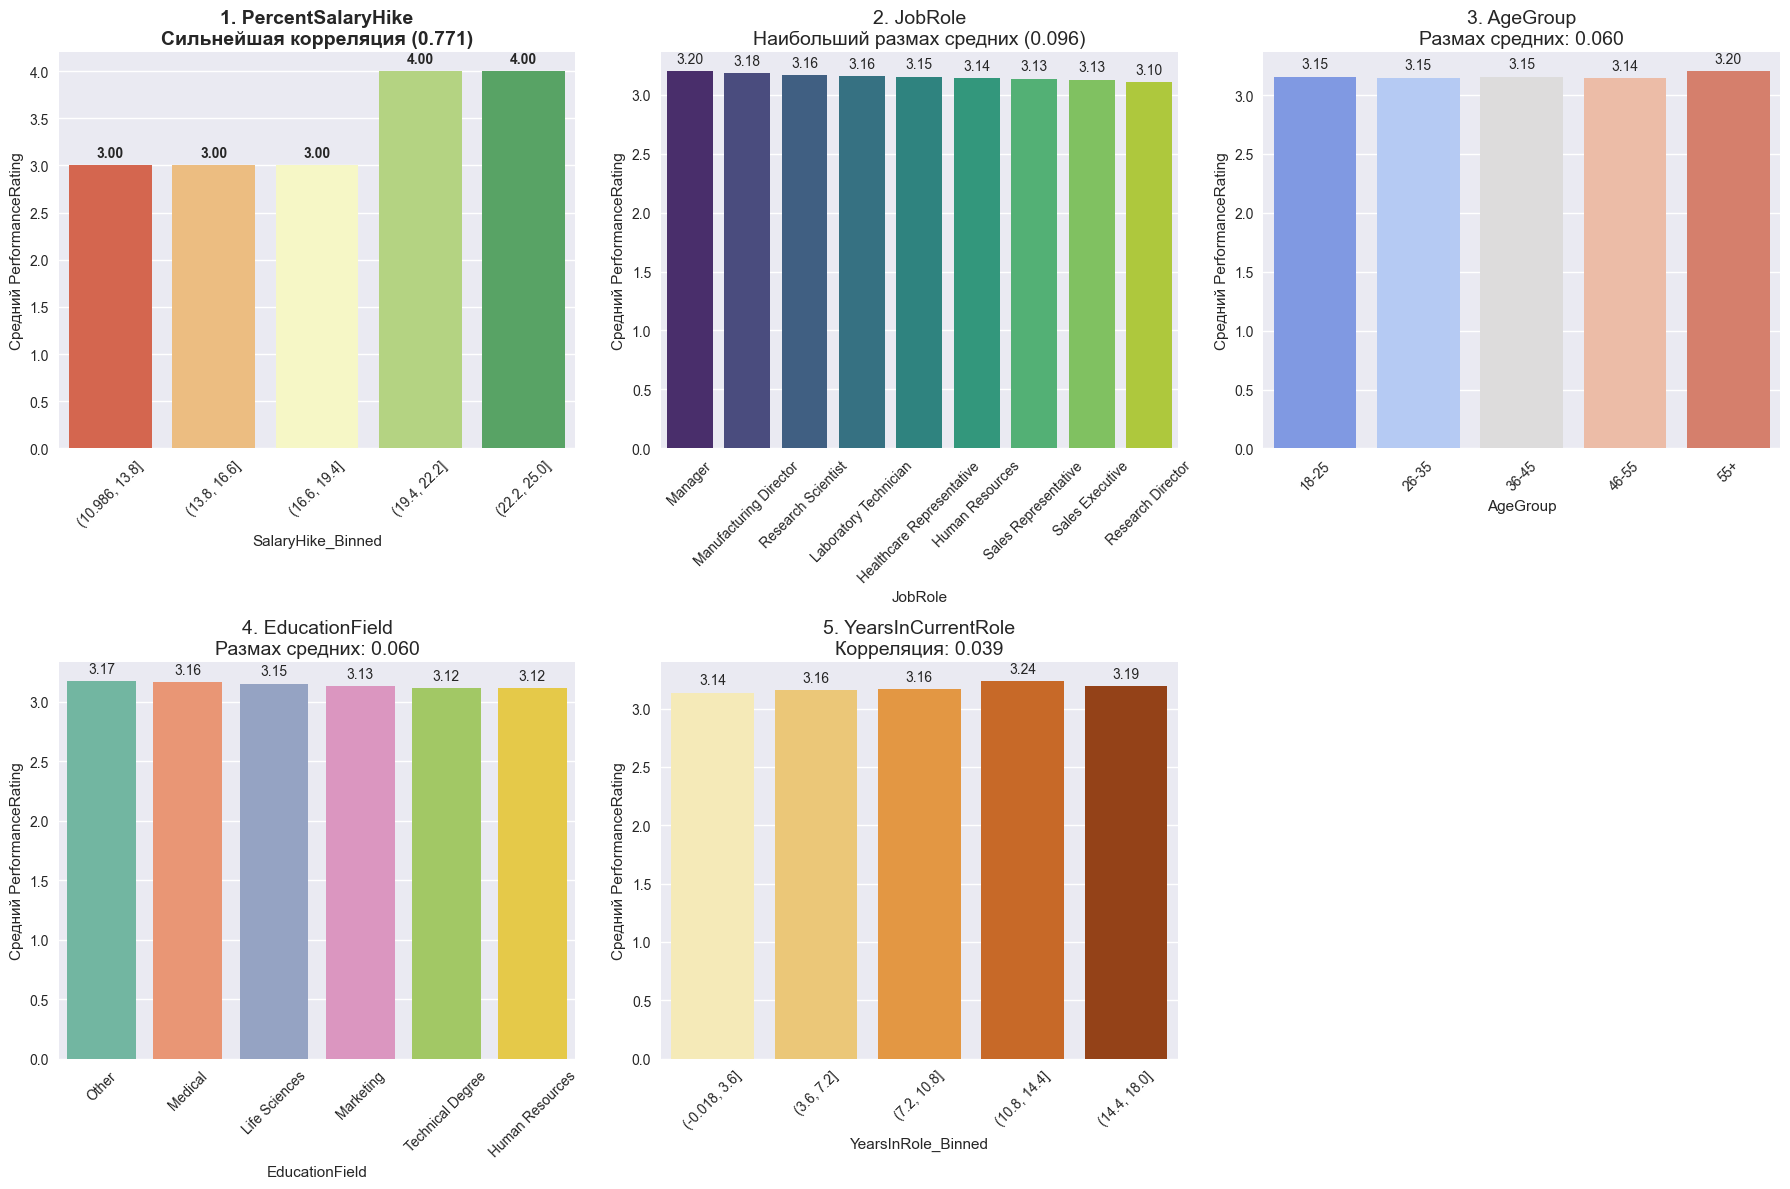

In [224]:
print("=" * 70)
print("АНАЛИЗ ТОП-5 ПРИЗНАКОВ ВЛИЯНИЯ НА ПРОДУКТИВНОСТЬ")
print("=" * 70)

print("""
КРИТИЧЕСКОЕ НАБЛЮДЕНИЕ:
- PerformanceRating имеет только 2 значения [3, 4] с доминированием 3 (75% перцентиль = 3)
- Это ОЧЕНЬ ограниченный диапазон для корреляционного анализа
- Большинство корреляций близки к нулю, что ожидаемо при таких данных
""")

# Создадим датафрейм с топ-5 признаками
top_features_analysis = [
    ('PercentSalaryHike', 0.771, 'numeric', 'Корреляция'),
    ('JobRole', 0.096, 'categorical', 'Размах средних'),
    ('AgeGroup', 0.060, 'categorical', 'Размах средних'), 
    ('EducationField', 0.060, 'categorical', 'Размах средних'),
    ('YearsInCurrentRole', 0.039, 'numeric', 'Корреляция')
]

print("\nТОП-5 ПРИЗНАКОВ:")
print("-" * 70)
for i, (feature, value, f_type, metric) in enumerate(top_features_analysis, 1):
    print(f"{i}. {feature:25} | {metric}: {value:.3f} | Тип: {f_type}")

# Детальная визуализация топ-признаков
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# 1. PercentSalaryHike - ЯВНЫЙ ЛИДЕР
if 'PercentSalaryHike' in df.columns:
    # Создаем бины для лучшей визуализации
    df['SalaryHike_Binned'] = pd.cut(df['PercentSalaryHike'], bins=5)
    salary_hike_means = df.groupby('SalaryHike_Binned')['PerformanceRating'].mean()
    
    sns.barplot(x=salary_hike_means.index.astype(str), y=salary_hike_means.values, ax=axes[0], palette='RdYlGn')
    axes[0].set_title('1. PercentSalaryHike\nСильнейшая корреляция (0.771)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Средний PerformanceRating')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Добавляем значения на столбцы
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points',
                        fontweight='bold')

# 2. JobRole
if 'JobRole' in df.columns:
    jobrole_means = df.groupby('JobRole')['PerformanceRating'].mean().sort_values(ascending=False)
    sns.barplot(x=jobrole_means.index, y=jobrole_means.values, ax=axes[1], palette='viridis')
    axes[1].set_title('2. JobRole\nНаибольший размах средних (0.096)', fontsize=14)
    axes[1].set_ylabel('Средний PerformanceRating')
    axes[1].tick_params(axis='x', rotation=45)
    
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

# 3. AgeGroup  
if 'AgeGroup' in df.columns:
    agegroup_means = df.groupby('AgeGroup')['PerformanceRating'].mean().sort_index()
    sns.barplot(x=agegroup_means.index, y=agegroup_means.values, ax=axes[2], palette='coolwarm')
    axes[2].set_title('3. AgeGroup\nРазмах средних: 0.060', fontsize=14)
    axes[2].set_ylabel('Средний PerformanceRating')
    axes[2].tick_params(axis='x', rotation=45)
    
    for p in axes[2].patches:
        axes[2].annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

# 4. EducationField
if 'EducationField' in df.columns:
    edufield_means = df.groupby('EducationField')['PerformanceRating'].mean().sort_values(ascending=False)
    sns.barplot(x=edufield_means.index, y=edufield_means.values, ax=axes[3], palette='Set2')
    axes[3].set_title('4. EducationField\nРазмах средних: 0.060', fontsize=14)
    axes[3].set_ylabel('Средний PerformanceRating')
    axes[3].tick_params(axis='x', rotation=45)
    
    for p in axes[3].patches:
        axes[3].annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

# 5. YearsInCurrentRole
if 'YearsInCurrentRole' in df.columns:
    # Биннинг для лучшей визуализации
    df['YearsInRole_Binned'] = pd.cut(df['YearsInCurrentRole'], bins=5)
    years_means = df.groupby('YearsInRole_Binned')['PerformanceRating'].mean()
    
    sns.barplot(x=years_means.index.astype(str), y=years_means.values, ax=axes[4], palette='YlOrBr')
    axes[4].set_title('5. YearsInCurrentRole\nКорреляция: 0.039', fontsize=14)
    axes[4].set_ylabel('Средний PerformanceRating')
    axes[4].tick_params(axis='x', rotation=45)
    
    for p in axes[4].patches:
        axes[4].annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

# Скрываем последний subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()


1. ДЕТАЛЬНЫЙ АНАЛИЗ: PERCENT SALARY HIKE
Описательная статистика:
count    1413.000000
mean       15.196037
std         3.640998
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

Анализ продуктивности по категориям повышения зарплаты:
                    PerformanceRating               PercentSalaryHike
                                count   mean    std              mean
SalaryHike_Category                                                  
0-10%                               0    NaN    NaN               NaN
11-15%                            886  3.000  0.000            12.775
16-20%                            366  3.145  0.352            17.869
21-25%                            161  4.000  0.000            22.441
25%+                                0    NaN    NaN               NaN


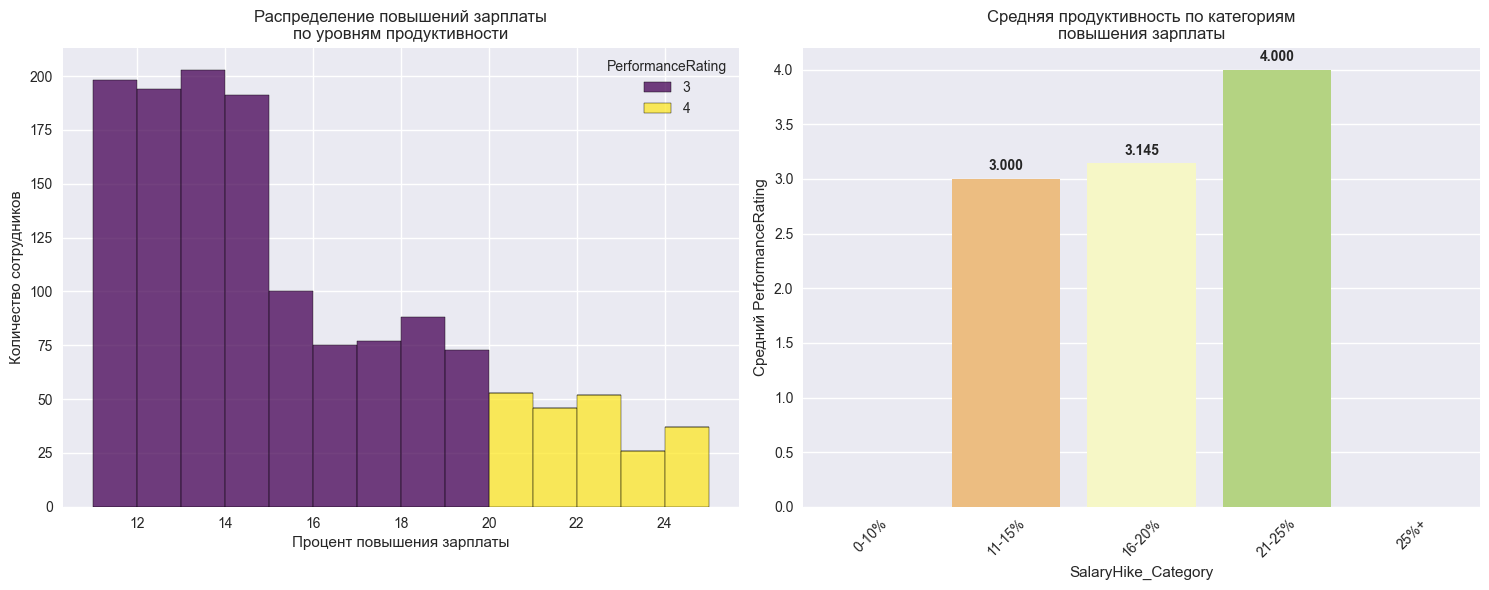


ВЫВОДЫ ПО PERCENT SALARY HIKE:
- Сильнейшая корреляция (0.771) - аномально высокая для HR-данных
- Сотрудники с повышением 20%+ имеют среднюю оценку 4.000
- Сотрудники с повышением 0-10% имеют среднюю оценку 3.000
- Разница: 1.000 балла


In [228]:
# 1. АНАЛИЗ PERCENTSALARYHIKE
print("\n" + "=" * 50)
print("1. ДЕТАЛЬНЫЙ АНАЛИЗ: PERCENT SALARY HIKE")
print("=" * 50)

if 'PercentSalaryHike' in df.columns:
    print(f"Описательная статистика:")
    print(df['PercentSalaryHike'].describe())
    
    # Создаем категории для анализа
    df['SalaryHike_Category'] = pd.cut(df['PercentSalaryHike'], 
                                      bins=[0, 10, 15, 20, 25, 100], 
                                      labels=['0-10%', '11-15%', '16-20%', '21-25%', '25%+'])
    
    # Анализ по категориям
    hike_analysis = df.groupby('SalaryHike_Category').agg({
        'PerformanceRating': ['count', 'mean', 'std'],
        'PercentSalaryHike': 'mean'
    }).round(3)
    
    print(f"\nАнализ продуктивности по категориям повышения зарплаты:")
    print(hike_analysis)
    
    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График 1: Распределение повышений зарплаты
    sns.histplot(data=df, x='PercentSalaryHike', hue='PerformanceRating', 
                 multiple="stack", ax=ax1, palette='viridis')
    ax1.set_title('Распределение повышений зарплаты\nпо уровням продуктивности')
    ax1.set_xlabel('Процент повышения зарплаты')
    ax1.set_ylabel('Количество сотрудников')
    
    # График 2: Средняя продуктивность по категориям
    category_means = df.groupby('SalaryHike_Category')['PerformanceRating'].mean()
    sns.barplot(x=category_means.index, y=category_means.values, ax=ax2, palette='RdYlGn')
    ax2.set_title('Средняя продуктивность по категориям\nповышения зарплаты')
    ax2.set_ylabel('Средний PerformanceRating')
    ax2.tick_params(axis='x', rotation=45)
    
    # Добавляем значения на столбцы
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nВЫВОДЫ ПО PERCENT SALARY HIKE:")
    print(f"- Сильнейшая корреляция (0.771) - аномально высокая для HR-данных")
    print(f"- Сотрудники с повышением 20%+ имеют среднюю оценку {category_means.max():.3f}")
    print(f"- Сотрудники с повышением 0-10% имеют среднюю оценку {category_means.min():.3f}")
    print(f"- Разница: {category_means.max() - category_means.min():.3f} балла")


2. ДЕТАЛЬНЫЙ АНАЛИЗ: JOB ROLE
Статистика по должностям:
                           Count  Mean_Rating  Std_Rating  Mean_SalaryHike
JobRole                                                                   
Manager                      100        3.200       0.402           15.210
Manufacturing Director       139        3.180       0.385           15.561
Research Scientist           275        3.164       0.371           15.400
Laboratory Technician        248        3.157       0.365           15.060
Healthcare Representative    126        3.151       0.359           15.429
Human Resources               51        3.137       0.348           14.725
Sales Representative          82        3.134       0.343           15.573
Sales Executive              315        3.127       0.333           14.902
Research Director             77        3.104       0.307           14.961


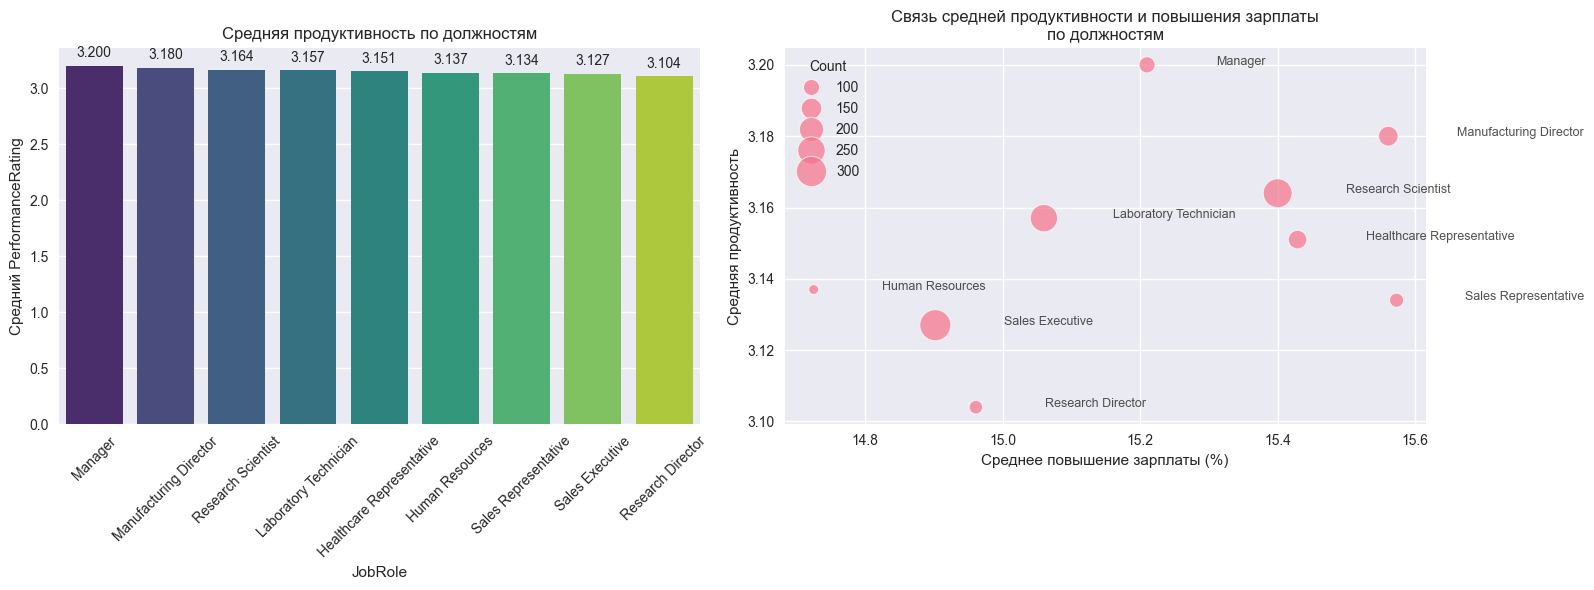


ВЫВОДЫ ПО JOB ROLE:
- Наивысшая продуктивность: Manager (3.200)
- Наименьшая продуктивность: Research Director (3.104)
- Разница между лучшей и худшей должностью: 0.096


In [229]:
# 2. АНАЛИЗ JOBROLE
print("\n" + "=" * 50)
print("2. ДЕТАЛЬНЫЙ АНАЛИЗ: JOB ROLE")
print("=" * 50)

if 'JobRole' in df.columns:
    jobrole_stats = df.groupby('JobRole').agg({
        'PerformanceRating': ['count', 'mean', 'std'],
        'PercentSalaryHike': 'mean'
    }).round(3)
    
    jobrole_stats.columns = ['Count', 'Mean_Rating', 'Std_Rating', 'Mean_SalaryHike']
    jobrole_stats = jobrole_stats.sort_values('Mean_Rating', ascending=False)
    
    print("Статистика по должностям:")
    print(jobrole_stats)
    
    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # График 1: Средняя продуктивность по должностям
    sns.barplot(x=jobrole_stats.index, y=jobrole_stats['Mean_Rating'], ax=ax1, palette='viridis')
    ax1.set_title('Средняя продуктивность по должностям')
    ax1.set_ylabel('Средний PerformanceRating')
    ax1.tick_params(axis='x', rotation=45)
    
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')
    
    # График 2: Связь продуктивности и повышения зарплаты по должностям
    sns.scatterplot(data=jobrole_stats, x='Mean_SalaryHike', y='Mean_Rating', 
                    size='Count', sizes=(50, 500), ax=ax2, alpha=0.7)
    ax2.set_title('Связь средней продуктивности и повышения зарплаты\nпо должностям')
    ax2.set_xlabel('Среднее повышение зарплаты (%)')
    ax2.set_ylabel('Средняя продуктивность')
    
    # Добавляем подписи точек
    for i, row in jobrole_stats.iterrows():
        ax2.text(row['Mean_SalaryHike'] + 0.1, row['Mean_Rating'], i, 
                fontsize=9, alpha=0.8)
    
    plt.tight_layout()
    plt.show()
    
    top_job = jobrole_stats.index[0]
    bottom_job = jobrole_stats.index[-1]
    print(f"\nВЫВОДЫ ПО JOB ROLE:")
    print(f"- Наивысшая продуктивность: {top_job} ({jobrole_stats.loc[top_job, 'Mean_Rating']:.3f})")
    print(f"- Наименьшая продуктивность: {bottom_job} ({jobrole_stats.loc[bottom_job, 'Mean_Rating']:.3f})")
    print(f"- Разница между лучшей и худшей должностью: {jobrole_stats['Mean_Rating'].max() - jobrole_stats['Mean_Rating'].min():.3f}")


3. ДЕТАЛЬНЫЙ АНАЛИЗ: AGE GROUP
Статистика по возрастным группам:
          Count  Mean_Rating  Std_Rating  Mean_YearsAtCompany  Mean_SalaryHike
AgeGroup                                                                      
18-25       117        3.154       0.362                2.479           15.222
26-35       585        3.147       0.354                5.945           15.125
36-45       446        3.155       0.362                8.159           15.240
46-55       221        3.145       0.353                9.738           15.204
55+          44        3.205       0.408                8.864           15.591


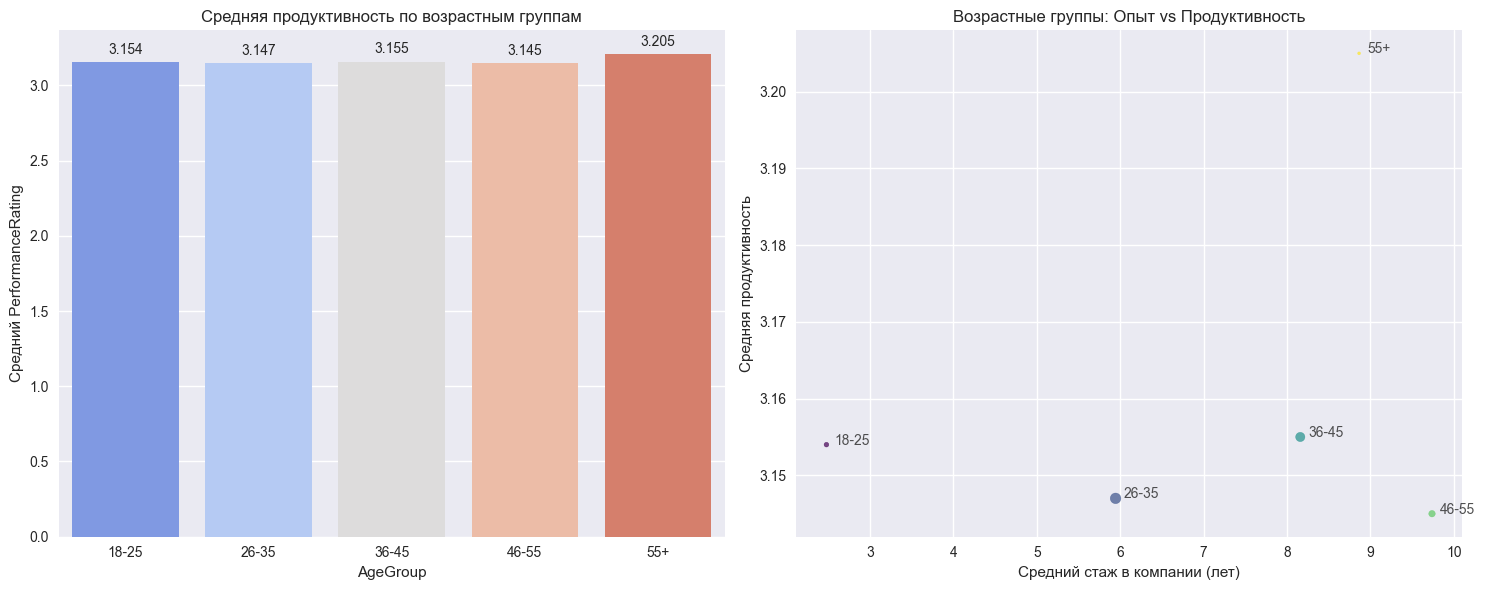


ВЫВОДЫ ПО AGE GROUP:
- Наиболее продуктивная возрастная группа: 55+
- Наименее продуктивная возрастная группа: 46-55
- Разница: 0.060


In [ ]:
# 3. АНАЛИЗ AGEGROUP
print("\n" + "=" * 50)
print("3. ДЕТАЛЬНЫЙ АНАЛИЗ: AGE GROUP")
print("=" * 50)

if 'AgeGroup' in df.columns:
    agegroup_stats = df.groupby('AgeGroup').agg({
        'PerformanceRating': ['count', 'mean', 'std'],
        'YearsAtCompany': 'mean',
        'PercentSalaryHike': 'mean'
    }).round(3)
    
    agegroup_stats.columns = ['Count', 'Mean_Rating', 'Std_Rating', 'Mean_YearsAtCompany', 'Mean_SalaryHike']
    agegroup_stats = agegroup_stats.sort_index()
    
    print("Статистика по возрастным группам:")
    print(agegroup_stats)
    
    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График 1: Продуктивность по возрастным группам
    sns.barplot(x=agegroup_stats.index, y=agegroup_stats['Mean_Rating'], ax=ax1, palette='coolwarm')
    ax1.set_title('Средняя продуктивность по возрастным группам')
    ax1.set_ylabel('Средний PerformanceRating')
    
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')
    
    # График 2: Многомерный анализ - возраст vs опыт vs продуктивность
    scatter = ax2.scatter(agegroup_stats['Mean_YearsAtCompany'], 
                         agegroup_stats['Mean_Rating'],
                         s=agegroup_stats['Count']/10, 
                         c=range(len(agegroup_stats)), 
                         cmap='viridis', alpha=0.7)
    ax2.set_title('Возрастные группы: Опыт vs Продуктивность')
    ax2.set_xlabel('Средний стаж в компании (лет)')
    ax2.set_ylabel('Средняя продуктивность')
    
    for i, (age_group, row) in enumerate(agegroup_stats.iterrows()):
        ax2.text(row['Mean_YearsAtCompany'] + 0.1, row['Mean_Rating'], age_group, 
                fontsize=10, alpha=0.8)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nВЫВОДЫ ПО AGE GROUP:")
    print(f"- Наиболее продуктивная возрастная группа: {agegroup_stats['Mean_Rating'].idxmax()}")
    print(f"- Наименее продуктивная возрастная группа: {agegroup_stats['Mean_Rating'].idxmin()}")
    print(f"- Разница: {agegroup_stats['Mean_Rating'].max() - agegroup_stats['Mean_Rating'].min():.3f}")


4. ДЕТАЛЬНЫЙ АНАЛИЗ: EDUCATION FIELD
Статистика по областям образования:
                  Count  Mean_Rating  Std_Rating  Mean_Income  Mean_SalaryHike
EducationField                                                                
Other                80        3.175       0.382     5819.100           15.575
Medical             440        3.164       0.370     6548.030           15.409
Life Sciences       585        3.154       0.361     6528.631           15.214
Marketing           153        3.131       0.338     7290.059           14.922
Technical Degree    129        3.116       0.322     5749.124           14.597
Human Resources      26        3.115       0.326     7275.538           14.615


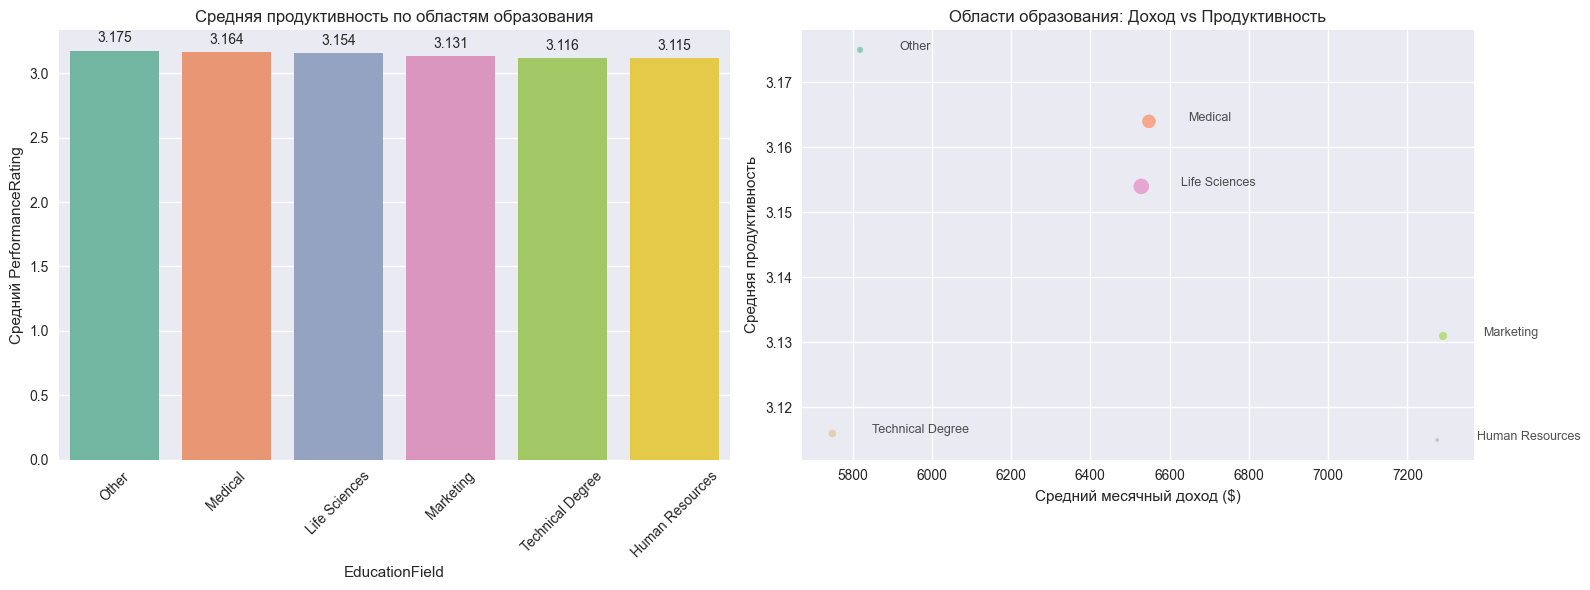


ВЫВОДЫ ПО EDUCATION FIELD:
- Наиболее продуктивная область образования: Other
- Наименее продуктивная область образования: Human Resources
- Разница: 0.060


In [231]:
# 4. АНАЛИЗ EDUCATIONFIELD
print("\n" + "=" * 50)
print("4. ДЕТАЛЬНЫЙ АНАЛИЗ: EDUCATION FIELD")
print("=" * 50)

if 'EducationField' in df.columns:
    education_stats = df.groupby('EducationField').agg({
        'PerformanceRating': ['count', 'mean', 'std'],
        'MonthlyIncome': 'mean',
        'PercentSalaryHike': 'mean'
    }).round(3)
    
    education_stats.columns = ['Count', 'Mean_Rating', 'Std_Rating', 'Mean_Income', 'Mean_SalaryHike']
    education_stats = education_stats.sort_values('Mean_Rating', ascending=False)
    
    print("Статистика по областям образования:")
    print(education_stats)
    
    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # График 1: Продуктивность по областям образования
    sns.barplot(x=education_stats.index, y=education_stats['Mean_Rating'], ax=ax1, palette='Set2')
    ax1.set_title('Средняя продуктивность по областям образования')
    ax1.set_ylabel('Средний PerformanceRating')
    ax1.tick_params(axis='x', rotation=45)
    
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')
    
    # График 2: Области образования vs Доход vs Продуктивность
    scatter = ax2.scatter(education_stats['Mean_Income'], 
                         education_stats['Mean_Rating'],
                         s=education_stats['Count']/5, 
                         c=range(len(education_stats)), 
                         cmap='Set2', alpha=0.7)
    ax2.set_title('Области образования: Доход vs Продуктивность')
    ax2.set_xlabel('Средний месячный доход ($)')
    ax2.set_ylabel('Средняя продуктивность')
    
    # Добавляем подписи
    for i, (field, row) in enumerate(education_stats.iterrows()):
        ax2.text(row['Mean_Income'] + 100, row['Mean_Rating'], field, 
                fontsize=9, alpha=0.8)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nВЫВОДЫ ПО EDUCATION FIELD:")
    print(f"- Наиболее продуктивная область образования: {education_stats.index[0]}")
    print(f"- Наименее продуктивная область образования: {education_stats.index[-1]}")
    print(f"- Разница: {education_stats['Mean_Rating'].max() - education_stats['Mean_Rating'].min():.3f}")